# Master's Project - Alaskan Salmon - 02/04/2025

## <span style="color:#ff0000;">Deadlines/Deliverables</span>


<span style="color:#ff0000;">Due: 02/05/2025</span>

Please create a GitHub repository for your capstone project, and share access with me (my GitHub handle is sshende). Your repository must have a README.md file describing your project - this README file should be kept up-to-date as your project evolves. Even if you are doing the project in a group (at most 2 students), you must have a repository. 

Please submit with this “assignment” a single Markdown file containing the GitHub repository address and a brief description of the proposed project and data source(s). The deadline for submission is Wednesday, Feb. 5th, by midnight. 


<span style="color:#ff0000;">Due: 04/01/2025</span>

* Have poster completed and in and printed by Tuesday, April 1st Drop-off date

<span style="color:#ff0000;">Due: 04/08/2025</span>

* Presentations are on Tuesday, April 8th 2025

## <span style="color:#FA8072;">Presentation - Alaskan Salmon</span>


### <span style="color:#FFA07A;">Abstract</span>


Alaska’s salmon industry is a vital economic and ecological mainstay for the state, contributing approximately 80% of North America’s wild caught salmon and serving as a major source of employment and revenue. However, the industry faces growing challenges from climate change, economic pressures, and international competition. This study investigates the correlation between environmental factors such as rising ocean temperatures, sea level changes, and ocean acidification and the quantity and quality of salmon caught in Alaska. 

The null hypothesis (H₀) assumes no significant relationship between these climate variables and salmon populations, while the alternative hypothesis (H₁) suggests that climate change has a measurable impact, affecting salmon migration, spawning behaviors, and overall catch potential. 

Additionally, this research explores the economic implications of these changes, labor costs, fuel prices, and global market competition. By analyzing historical environmental data, salmon population metrics, and economic trends, this study aims to provide insights into the sustainability of the Alaskan salmon industry amid evolving climate conditions. The findings may inform policy decisions, conservation efforts, and adaptive strategies for industry stakeholders.

### <span style="color:#FFA07A;">Hypothesis</span>


H0 (Null Hypothesis): 

* There is no significant correlation between climate change factors (temperature, sea levels) and the quantity/quality of salmon caught in Alaska.

H1 (Alternative Hypothesis):

* Rising ocean temperatures and sea levels significantly impacting the quantity and quality of Alaskan salmon, leading to noticeable effects on the fishing industry.

<span style="color:#FFA07A;">Why this is important</span>


* Largest harvest in North America: Alaska's salmon harvest is the largest in North America, accounting for about 80% of the total wild-caught catch. 
* Employment: More Alaskans work in salmon harvesting and processing than in any other commercial fishery. 
* Economics: Salmon accounts for the majority of the value of Alaska seafood. 


<span style="color:#1ff2cf;">Challenges facing the salmon industry</span>

* Inflation: High inflation and interest rates have squeezed profits and liquidity for salmon processors. 
* Labor: Wages for processing workers have increased sharply. 
* Fuel: Diesel fuel prices have increased sharply. 
* Competition: Alaskan fishermen compete against unsustainable fishing and forced labor in foreign imports. 

### <span style="color:#FFA07A;">Key Factors</span>


Environmental Data:

* Ocean and river temperatures over time.
* Sea level changes in Alaskan fishing regions.
* Ocean pH levels (impacting food chains).
* Climate patterns (precipitation, storms, etc.).

Salmon Population & Quality Data:

* Total catch size (commercial and subsistence fishing).
* Average salmon weight and size.
* Disease prevalence and mortality rates.
* Changes in migration and spawning behaviors.

Economic & Industry Impact:

* Revenue trends in the Alaskan salmon industry.
* Changes in regulations and fishing quotas.
* Shifts in fishing seasons due to climate change.

### <span style="color:#FFA07A;">Datasets/Prepping Dataframes</span>


* https://erddap.bco-dmo.org/erddap/tabledap/bcodmo_dataset_3106.htmlTable

In [111]:
# get dataset
import pandas as pd
salmon = pd.read_csv('https://github.com/eadamsRU/Masters_Project/raw/refs/heads/main/Salmon_biodata_bcodm%20-%20salmon_biodata.csv')


In [112]:
salmon.tail(5)

,year,transect,sta_id,haul_id,month_local,day_local,yrday_local,latitude,longitude,depth_w_meters,...,length_frozen_cm,length_wet_cm,weight_froz_grams,weight_wet_grams,sex,maturity,stomwt_full,stomwt_empty,sealice,comments
27505,2004,nd,I10,2004031,11,8,313,57.3,-155.51,266,...,nd,229,nd,112,nd,J,0,0,0,nd
27506,2004,nd,I10,2004031,11,8,313,57.3,-155.51,266,...,nd,231,nd,121,nd,J,0,0,0,nd
27507,2004,nd,I10,2004031,11,8,313,57.3,-155.51,266,...,nd,216,nd,107,nd,J,0,0,0,nd
27508,2004,nd,I10,2004031,11,8,313,57.3,-155.51,266,...,nd,215,nd,105,nd,J,0,0,0,nd
27509,2004,nd,I10,2004031,11,8,313,57.3,-155.51,266,...,nd,221,nd,102,nd,J,0,0,0,nd


In [113]:
salmon.dtypes

year                     int64
transect                object
sta_id                  object
haul_id                  int64
month_local              int64
day_local                int64
yrday_local              int64
latitude               float64
longitude              float64
depth_w_meters          object
species_common_name     object
length_frozen_cm        object
length_wet_cm           object
weight_froz_grams       object
weight_wet_grams        object
sex                     object
maturity                object
stomwt_full             object
stomwt_empty            object
sealice                 object
comments                object
dtype: object

In [114]:
# Find non-numeric values in the selected columns
for col in columns_to_convert:
    non_numeric = salmon[col][pd.to_numeric(salmon[col], errors='coerce').isna()].unique()
    print(f"Non-numeric values in {col}: {non_numeric}")


NameError: name 'columns_to_convert' is not defined

In [ ]:
# drop all rows with missing values
salmon = salmon.dropna(subset=columns_to_convert)


In [ ]:
print(salmon[columns_to_convert].dtypes)

In [ ]:
# I am casting from object to float for these columns with decimal numberts
columns_to_convert = salmon['length_frozen_cm']  # replace with your actual column names
#salmon[columns_to_convert] = salmon[columns_to_convert].astype('float64')

In [ ]:
nd_rows = salmon[salmon.applymap(lambda x: x == 'nd')]
print(nd_rows)



These following 3 code blocks got rid of the nd rows

In [ ]:
import numpy as np

# Replace all 'nd' values with NaN
salmon = salmon.applymap(lambda x: np.nan if x == 'nd' else x)

# Verify if 'nd' has been replaced
print(salmon.isna().sum())  # Shows count of NaN values in each column


year                       0
transect                3643
sta_id                     0
haul_id                    0
month_local                0
day_local                  0
yrday_local                0
latitude                   0
longitude                  0
depth_w_meters           195
species_common_name        0
length_frozen_cm       12930
length_wet_cm           4036
weight_froz_grams      12840
weight_wet_grams        4060
sex                    19718
maturity                   0
stomwt_full            19402
stomwt_empty           19402
sealice                 9662
comments               26797
dtype: int64


C:\Users\mecto\AppData\Local\Temp\ipykernel_11924\3843624464.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  salmon = salmon.applymap(lambda x: np.nan if x == 'nd' else x)


In [ ]:
print((salmon == 'nd').sum().sum())  # Should print 0 if all 'nd' are replaced

0


In [ ]:
print(salmon.isna().sum())  # Shows count of NaN values per column


year                       0
transect                3643
sta_id                     0
haul_id                    0
month_local                0
day_local                  0
yrday_local                0
latitude                   0
longitude                  0
depth_w_meters           195
species_common_name        0
length_frozen_cm       12930
length_wet_cm           4036
weight_froz_grams      12840
weight_wet_grams        4060
sex                    19718
maturity                   0
stomwt_full            19402
stomwt_empty           19402
sealice                 9662
comments               26797
dtype: int64


In [ ]:
# may be able to delete this as it was unnecessary
# columns_to_convertFloat = columns_to_convert.astype('float64')

Need top cast a lot of these objects to float, such as length and weight

In [ ]:
# If you want to convert multiple columns
# I am casting from object to float for these columns with decimal numberts
columns_to_convert = salmon['depth_w_meters','depth_w_meters', 'length_frozen_cm', 'length_wet_cm', 'weight_froz_grams', 'weight_wet_grams']  # replace with your actual column names
salmon[columns_to_convert] = salmon[columns_to_convert].astype('float64')

## <span style="color:#FA8072;">2025-02-08 - Salmon Data Analysis</span>


Let us do some data prep and analysis to see what this salmon biological dataset gives us.

In [115]:
species_counts = salmon['species_common_name'].value_counts()
print(species_counts)

species_common_name
Pink       12615
Chum        9543
Sockeye     2460
Coho        2170
Chinook      722
Name: count, dtype: int64


In [205]:
# Calculate correlation between length and weight
correlation = salmon['length_wet_cm'].corr(salmon['weight_wet_grams'])
print(f'Correlation between length and weight: {correlation}')


ValueError: could not convert string to float: 'nd'

<b><span style="color:#c0cfb2;">Data Visualization</span></b>


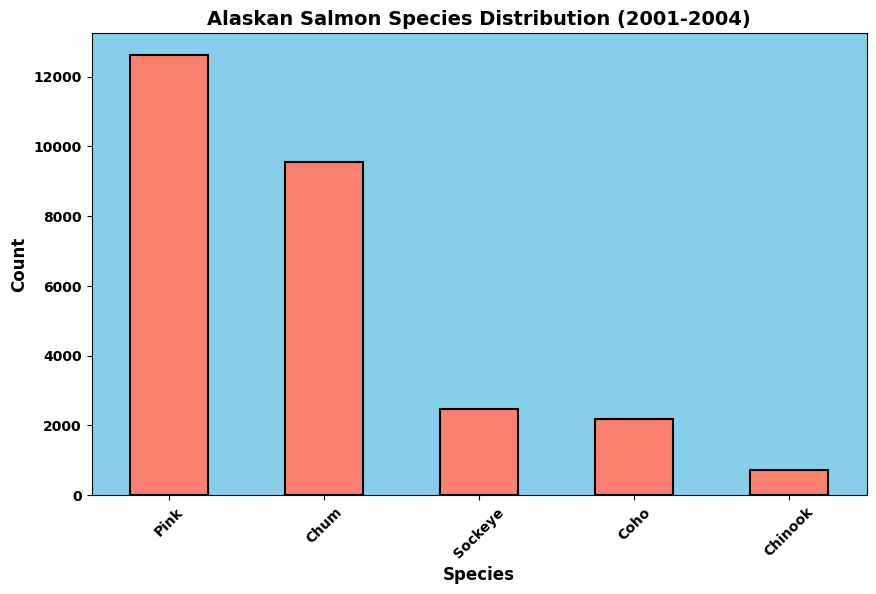

In [232]:
import matplotlib.pyplot as plt

# Plot species distribution
ax = species_counts.plot(kind='bar', figsize=(10, 6), color = '#FA8072')

# Set background color
ax.set_facecolor('#87CEEB')  # Light gray background

# Plot species distribution with bar outline
species_counts.plot(kind='bar', ax=ax, color='#FA8072', edgecolor='black', linewidth=1.5)  # Bar outline


plt.title('Alaskan Salmon Species Distribution (2001-2004)', fontsize=14, fontweight='bold')
plt.xlabel('Species', fontsize=12, fontweight='bold')  # Bold x-axis label
plt.ylabel('Count', fontsize=12, fontweight='bold')  # Bold y-axis label
plt.xticks(rotation=45, fontsize=10, fontweight='bold')  # Rotate x-axis labels and make them bold
plt.yticks(fontsize=10, fontweight='bold')  # Make y-axis ticks bold


plt.show()


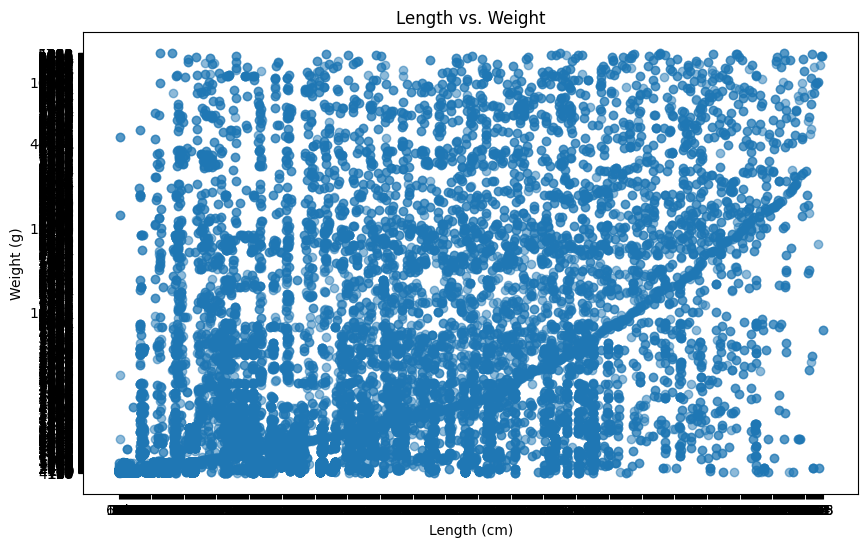

In [207]:
# Scatter plot of length vs. weight
plt.figure(figsize=(10, 6))
plt.scatter(salmon['length_wet_cm'], salmon['weight_wet_grams'], alpha=0.5)
plt.title('Length vs. Weight')
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.show()


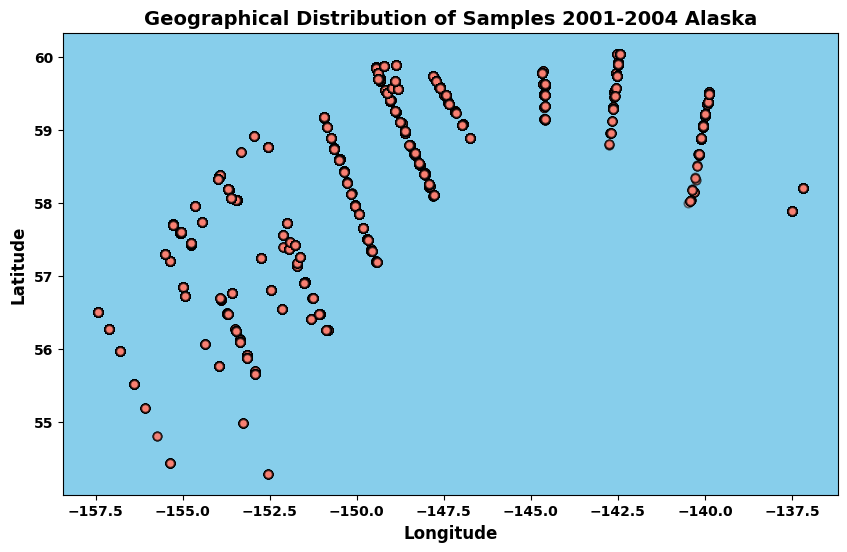

In [229]:
import matplotlib.pyplot as plt

# Create figure and axis
plt.figure(figsize=(10, 6))
ax = plt.gca()  # Get current axis

# Set background color to sky blue
ax.set_facecolor('#87CEEB')  # Sky blue

# Scatter plot with orange dots and black outline
plt.scatter(salmon['longitude'], salmon['latitude'], 
            color='#FA8072', edgecolors='black', linewidth=1.2, alpha=0.5)

# Set labels and title with bold font
plt.title('Geographical Distribution of Samples 2001-2004 Alaska', fontsize=14, fontweight='bold')
plt.xlabel('Longitude', fontsize=12, fontweight='bold')
plt.ylabel('Latitude', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')  # Rotate x-axis labels and make them bold
plt.yticks(fontsize=10, fontweight='bold')  # Make y-axis ticks bold

# Show the plot
plt.show()

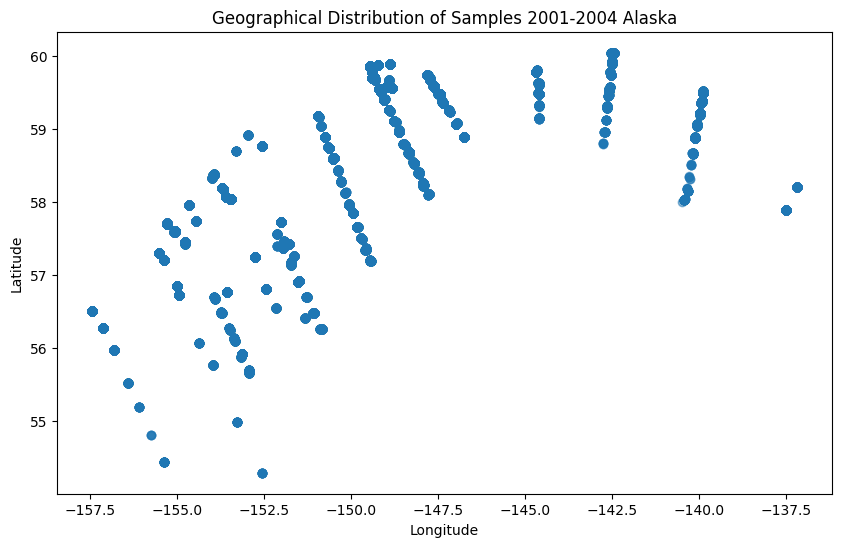

In [224]:
# Scatter plot of sampling locations
plt.figure(figsize=(10, 6))
plt.scatter(salmon['longitude'], salmon['latitude'], alpha=0.5)
plt.title('Geographical Distribution of Samples 2001-2004 Alaska')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


using alaska shapefile - 03/30/2025

In [ ]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

#import mapclassify #need for thematic map classification

In [ ]:
! wget -q -O alaska.zip https://github.com/eadamsRU/Masters_Project/raw/refs/heads/main/cb_2018_02_place_500k.zip

zip_ref = zipfile.ZipFile('cb_2018_02_place_500k.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
AlaskaMap=gpd.read_file('cb_2018_02_place_500k.shp') #load the shapefile with gpd as njC

'wget' is not recognized as an internal or external command,
operable program or batch file.


FileNotFoundError: [Errno 2] No such file or directory: 'cb_2018_02_place_500k.zip'

The above graph with geopandas

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame `df` with columns 'latitude' and 'longitude'
# If it's not in the correct format, convert them to a GeoDataFrame.

# Create a GeoDataFrame from your DataFrame
gdf = gpd.GeoDataFrame(salmon, geometry=gpd.points_from_xy(salmon['longitude'], salmon['latitude']))

# Load a map of Alaska (you can use a shapefile for Alaska's boundaries)
world = gpd.read_file('C:\\Users\\mecto\\Desktop\\VSC Projects\\Masters_Spring2025\\MastersProject_Salmon\\ne_10m_admin_0_countries.shp')  # Replace with the path to the shapefile

# Filter the world map to only show Alaska (you can download a shapefile of Alaska if needed)
alaska = world[world.name == 'United States of America']

# Plot the map of Alaska
fig, ax = plt.subplots(figsize=(10, 6))
alaska.plot(ax=ax, color='lightgrey', edgecolor='black')

# Overlay your sampling points (scatter plot)
gdf.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.5)

# Title and labels
plt.title('Geographical Distribution of Samples in Alaska')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


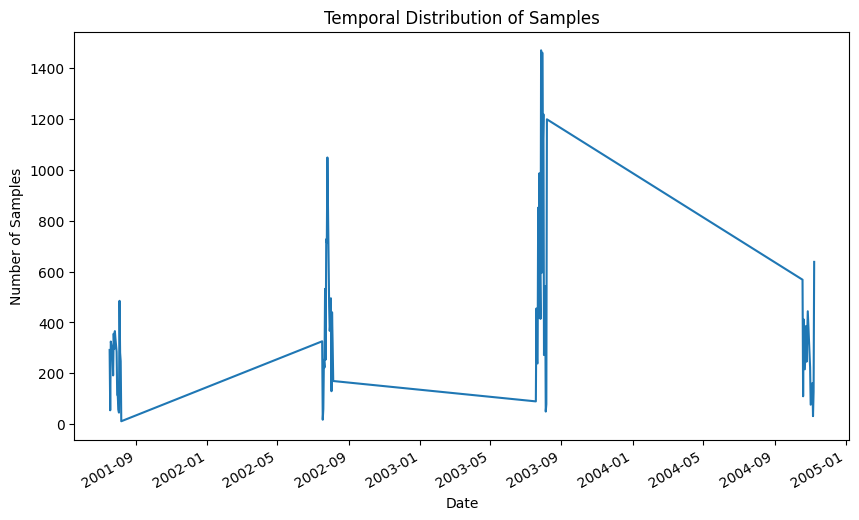

In [ ]:
# Convert year and day to datetime
salmon['date'] = pd.to_datetime(salmon['year'].astype(str) + salmon['yrday_local'].astype(str), format='%Y%j', errors='coerce')

# Plot number of samples over time
salmon['date'].value_counts().sort_index().plot(kind='line', figsize=(10, 6))
plt.title('Temporal Distribution of Samples')
plt.xlabel('Date')
plt.ylabel('Number of Samples')
plt.show()


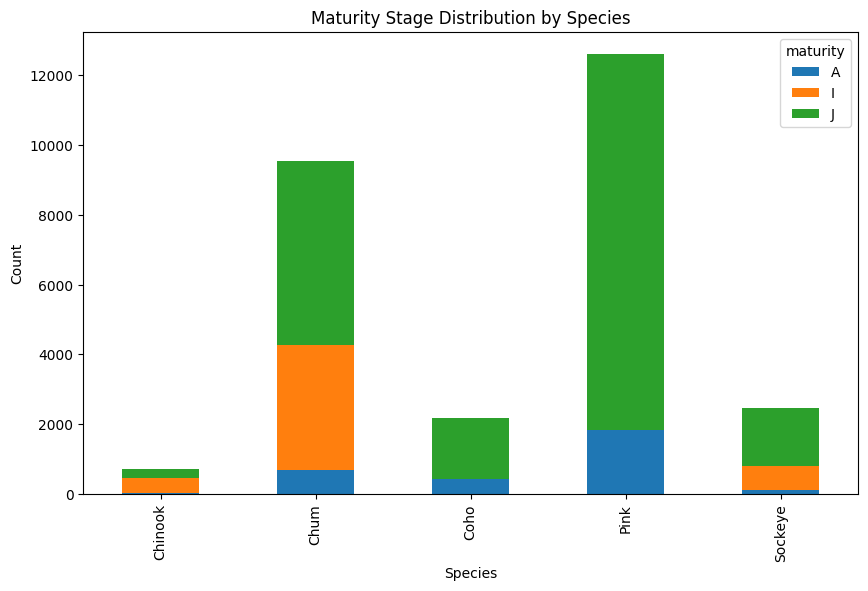

In [ ]:
# Count maturity stages for each species
maturity_counts = salmon.groupby(['species_common_name', 'maturity']).size().unstack().fillna(0)

# Plot stacked bar chart
maturity_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Maturity Stage Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


In [ ]:
import seaborn as sns

# Scatter plot with regression lines for each species
plt.figure(figsize=(10, 6))
sns.lmplot(x='length_wet_cm', y='weight_wet_grams', hue='species_common_name', data=salmon, aspect=1.5)
plt.title('Length vs. Weight by Species')
plt.xlabel('Length (mm)')
plt.ylabel('Weight (g)')
plt.show()


Update this below graph which each species name for species_#_data

<Figure size 1000x600 with 0 Axes>

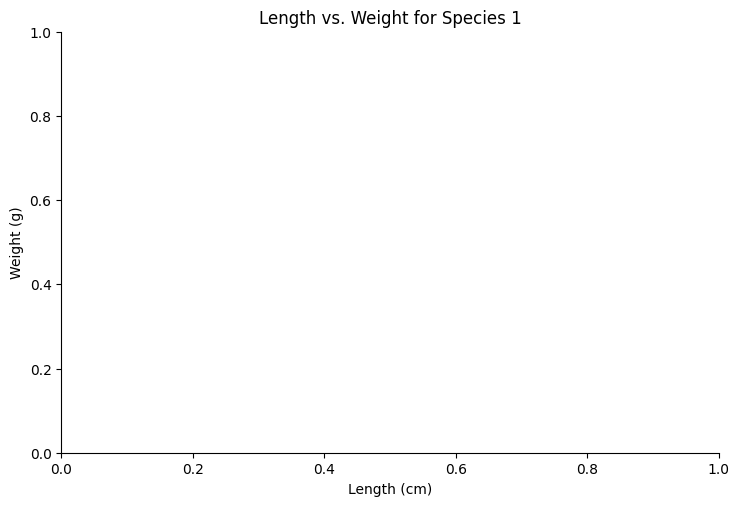

<Figure size 1000x600 with 0 Axes>

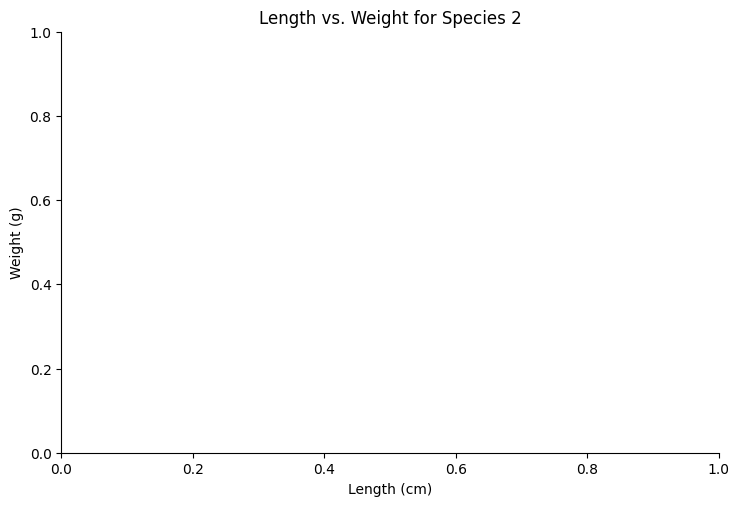

<Figure size 1000x600 with 0 Axes>

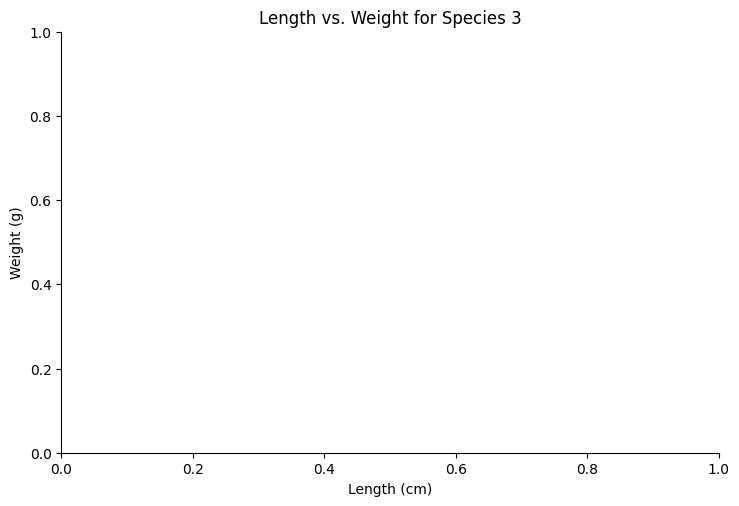

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot for species 1 (replace with actual species name)
species_1_data = salmon[salmon['species_common_name'] == 'Species_1']  # Replace 'Species_1' with the actual species name
plt.figure(figsize=(10, 6))
sns.lmplot(x='length_wet_cm', y='weight_wet_grams', data=species_1_data, aspect=1.5)
plt.title('Length vs. Weight for Species 1')  # Replace with actual species name
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.show()

# Plot for species 2 (replace with actual species name)
species_2_data = salmon[salmon['species_common_name'] == 'Species_2']  # Replace 'Species_2' with the actual species name
plt.figure(figsize=(10, 6))
sns.lmplot(x='length_wet_cm', y='weight_wet_grams', data=species_2_data, aspect=1.5)
plt.title('Length vs. Weight for Species 2')  # Replace with actual species name
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.show()

# Plot for species 3 (replace with actual species name)
species_3_data = salmon[salmon['species_common_name'] == 'Species_3']  # Replace 'Species_3' with the actual species name
plt.figure(figsize=(10, 6))
sns.lmplot(x='length_wet_cm', y='weight_wet_grams', data=species_3_data, aspect=1.5)
plt.title('Length vs. Weight for Species 3')  # Replace with actual species name
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.show()



### <span style="color:#8ac0ff;">Presentation 1</span>


1. 
Genetic Variation Across Populations
Hypothesis: Certain genetic mutations (I want to have a focus on neurodegenerative diseases if possible. Otherwise some other diseases that could be genetic/hereditary) I want to see if there are any coorelations in specific populations (age, sex, race, etc.) or regions through the world.

1.a. 
	
	Genetic Variation Across Populations
	[Refined] Hypotheses:

	H1: Certain SNPs are significantly more prevalent in specific geographic populations, reflecting historical migration patterns.
	H2: There’s a correlation between specific genetic variants and environmental factors like altitude or climate.
	H3: Population substructures (hidden genetic groupings within larger populations) can be detected through PCA or clustering techniques.
	Data Sources:

	1000 Genomes Project: Provides comprehensive SNP data from diverse populations.
	HGDP (Human Genome Diversity Project): Offers genetic data from indigenous populations worldwide.
	Approaches:

	PCA/Cluster Analysis: Identify how populations cluster based on genetic similarities.
	FST Analysis (Fixation Index): Measure genetic differentiation between populations.
	Visualization Ideas:
	PCA scatter plots colored by population groups.
	World maps with pie charts indicating allele frequencies.
	Heatmaps showing genetic distances between populations.


1.b. 
		
		1. Define the Focus
		We can refine the hypothesis even more depending on the disease and type of analysis you're interested in.

		Possible Hypotheses:

		H1: Differential gene expression can distinguish cancerous tissues from healthy tissues.
		H2: Certain gene expression profiles can predict patient outcomes (e.g., survival rates in cancer patients).
		H3: Gene co-expression networks reveal key regulatory genes responsible for disease progression.
		Do you want to focus on a specific disease, like cancer (e.g., breast, lung, leukemia), or explore something more broad, like autoimmune diseases or diabetes?

		2. Data Sources & Acquisition
		Here are a couple of great places to get started:

		The Cancer Genome Atlas (TCGA):

		Offers RNA-seq data for various cancer types along with clinical metadata (e.g., patient outcomes).
		We can use the TCGAbiolinks library to fetch data directly into Python.
		Gene Expression Omnibus (GEO):

		Contains expression data for a variety of diseases, not just cancer.
		We can use the GEOparse library to work with this data.
		ArrayExpress:

		Similar to GEO but might have unique datasets, especially for non-cancer diseases.
		3. Data Science Workflow
		Here’s a high-level overview of what we can do:

		Data Preprocessing:

		Clean and normalize the gene expression data (e.g., log transformation).
		Merge with clinical metadata (like disease status or survival outcomes).
		Exploratory Data Analysis (EDA):

		Use PCA to visualize high-dimensional data.
		Plot heatmaps to see clustering of expression profiles.
		Differential Expression Analysis:

		Use statistical tests (e.g., t-test, ANOVA) to find genes that are significantly differentially expressed between healthy and diseased samples.
		Visualize with volcano plots.
		Machine Learning for Prediction:

		Build classifiers (e.g., Random Forest, Logistic Regression, SVM) to predict disease status from gene expression data.
		Evaluate performance using ROC curves and confusion matrices.
		Gene Network Analysis (Optional but cool!):

		Construct co-expression networks to identify hub genes that might play key roles in disease pathways.
		Use libraries like NetworkX for visualization.
		4. Visualization Ideas
		Volcano Plot: Shows genes that are significantly upregulated or downregulated.
		Heatmaps: For gene expression clustering.
		PCA Plots: Visualize how well samples separate based on disease status.
		ROC Curves: To evaluate the accuracy of your predictive models.
		Gene Co-expression Networks: Visual graphs showing how genes interact in diseased vs. healthy samples.

1.c. 
			1. Data Acquisition:
			To compare multiple neurodegenerative disorders, you'll need comprehensive and well-annotated datasets. Here are some valuable resources:

			Gene Expression Omnibus (GEO): A vast repository of gene expression data across various conditions.

			Dataset Example: GSE26927 provides genome-wide gene expression data for Alzheimer's disease, amyotrophic lateral sclerosis, Huntington's disease, multiple sclerosis, Parkinson's disease, and schizophrenia using post-mortem CNS tissues. 
			NCBI.NLM.NIH.GOV
			Neurodegenerative Disease Knowledge Portal (NDKP): Contains genomic datasets, including genotyping and sequencing studies, across multiple neurodegenerative diseases. 
			PMC.NCBI.NLM.NIH.GOV

			NIAGADS Data Sharing Service: Offers datasets like the Seattle Alzheimer's Disease Brain Cell Atlas, which includes whole genome sequencing and genotyping data. 
			DSS.NIAGADS.ORG

			Elucidata's Curated Datasets: Provides transcriptomic and single-cell data for diseases such as ALS, Parkinson's, Huntington's, and Alzheimer's. 
			ELUCIDATA.IO

			Accessing Data:

			GEO: Use the GEOquery package in R or download data directly from the GEO website.

			NDKP and NIAGADS: These platforms may require account creation and data access requests due to controlled access policies.

			2. Analysis Pipeline Setup:

			A structured analysis pipeline ensures reproducibility and efficiency. Here's a step-by-step guide:

			a. Data Preprocessing:

			Quality Control: Assess raw sequencing data quality using tools like FastQC.

			Trimming: Remove low-quality bases and adapters with tools such as Trimmomatic or Cutadapt.

			b. Alignment:

			Align Reads: Map reads to a reference genome using aligners like STAR or HISAT2.
			c. Quantification:

			Count Reads: Use featureCounts or HTSeq to assign reads to genomic features, generating a count matrix.
			d. Differential Expression Analysis:

			Normalization and Statistical Testing: Utilize DESeq2 for normalization and identification of differentially expressed genes.
			e. Functional Enrichment:

			Pathway Analysis: Employ tools like clusterProfiler to identify enriched biological pathways among differentially expressed genes.
			Python Integration:

			While many RNA-Seq analysis tools are R-based, Python offers alternatives:

			pyDESeq2: A Python implementation of DESeq2 for differential expression analysis. 
			YOUTUBE.COM

			pyrpipe: A Python package providing access to popular RNA-Seq tools via high-level APIs, facilitating pipeline customization. 
			ACADEMIC.OUP.COM

			Workflow Management:

			Snakemake: A Python-based workflow management system that ensures reproducibility and scalability.
			Visualization:

			Heatmaps and PCA Plots: Use libraries like Matplotlib and Seaborn in Python or ggplot2 in R to visualize gene expression patterns and sample clustering.

			3. Additional Resources:

			Tutorials:

			RNA-Seq Data Analysis Pipeline: A comprehensive guide detailing each step of the RNA-Seq analysis process. 
			PMC.NCBI.NLM.NIH.GOV

			PyDESeq2 Workflow: An example workflow demonstrating differential expression analysis using PyDESeq2. 
			PYDESEQ2.READTHEDOCS.IO

			Video Guides:

			Differential Expression in Python with pyDESeq2: A tutorial covering basic differential expression analysis, PCA plots, and GSEA. 
			YOUTUBE.COM

			Setup RNA-Seq Pipeline from Scratch: A step-by-step video guide on setting up an RNA-Seq analysis pipeline. 
			YOUTUBE.COM



## <span style="color:#BDDEEC;">2025-02-12 - Climate Data Analysis</span>


Let's get ~10 weather stations in Alaska that align with our fishing datasets to get a general idea of what the temperatures are like where we are fishing.

We will later cluster these and give it names for each channel fishing location and weather station.

Homer, Juneau, and Kodiak are some big name fishing spots in Alaska

1. Anchorage International Airport (PANC)

    * Location: Anchorage, AK

    * Coordinates: 61.1743° N, 149.9982° W

    * Description: Major weather station providing extensive data for south-central Alaska.

2. Fairbanks International Airport (PAFA)

    * Location: Fairbanks, AK

    * Coordinates: 64.8039° N, 147.8761° W

    * Description: Key station offering data for interior Alaska.

3. Juneau International Airport (PAJN)

    * Location: Juneau, AK

    * Coordinates: 58.3549° N, 134.5763° W

    * Description: Provides weather data for the southeastern region.

4. Nome Airport (PAOM)

    * Location: Nome, AK

    * Coordinates: 64.5122° N, 165.4452° W

    * Description: Covers the western coastal areas.

5. Barrow (Utqiaġvik) Wiley Post–Will Rogers Memorial Airport (PABR)

    * Location: Utqiaġvik, AK

    * Coordinates: 71.2854° N, 156.7660° W

    * Description: Northernmost station providing Arctic data.

6. Kodiak Airport (PADQ)

    * Location: Kodiak, AK

    * Coordinates: 57.7499° N, 152.4938° W

    * Description: Offers data for the Gulf of Alaska region.

7. Bethel Airport (PABE)

    * Location: Bethel, AK

    * Coordinates: 60.7798° N, 161.8370° W

    * Description: Provides information for the Yukon-Kuskokwim Delta.

8. King Salmon Airport (PAKN)

    * Location: King Salmon, AK

    * Coordinates: 58.6768° N, 156.6492° W

    * Description: Covers the Bristol Bay area.

9. Yakutat Airport (PAYA)

    * Location: Yakutat, AK

    * Coordinates: 59.5033° N, 139.6602° W

    * Description: Provides data for the northern Gulf Coast.

10. McGrath Airport (PAMC)

    * Location: McGrath, AK

    * Coordinates: 62.9529° N, 155.6060° W

    * Description: Offers insights into central Alaska's weather patterns.



<span style="color:#BDDEEC ;"> <b>Demo our weather station datasets</span>


<span style="color:#ff0000;"><b>How we query for the above:</b></span>

Climate Sources:

* select Location Type
    * State
        * Alaska
            
https://www.ncdc.noaa.gov/cdo-web/datatools/lcd

## <span style="color:#ffd900;">2025-02-26 - Check in Key Points</span>


Climate Data

* Need to get more Sea data.
* Thermal levels through the years
    * NOAA as a resource

Salmon Data

* More of the same but with more year ranges and focus on last few years especially
* Possibly start thinking about adding more fish in alaska and if there are similiar signs of change in relation to the climate data through the years

Alaska Economic Data

* see datasets relating to Alaska economy like trucking, canning industry


See information about glaciers in Alaska, figure out how to overlay that data on an Alaskan map


## <span style="color:#FA8072;">2025-03-13 - Data Analysis (Plotnine library)</span>


* using NOAA finding climate data for the date range I have for the Salmon datasets

In [117]:
'''
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars

(
    ggplot(mtcars, aes("wt", "mpg", color="factor(gear)"))
    + geom_point()
    + stat_smooth(method="lm")
    + facet_wrap("gear")
)
'''

'\nfrom plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap\nfrom plotnine.data import mtcars\n\n(\n    ggplot(mtcars, aes("wt", "mpg", color="factor(gear)"))\n    + geom_point()\n    + stat_smooth(method="lm")\n    + facet_wrap("gear")\n)\n'

### <span style="color:#FA8072;">Filtering our Salmon datasets</span>

In [118]:
# salmon.head(3)
salmon_2001 = salmon[salmon["year"] == 2001]

In [119]:
print(salmon_2001)

      year      transect sta_id  haul_id  month_local  day_local  yrday_local  \
0     2001     Icy_Point    IP2  2001001            7         17          198   
1     2001     Icy_Point    IP2  2001001            7         17          198   
2     2001     Icy_Point    IP2  2001001            7         17          198   
3     2001     Icy_Point    IP2  2001001            7         17          198   
4     2001     Icy_Point    IP2  2001001            7         17          198   
...    ...           ...    ...      ...          ...        ...          ...   
4138  2001  Cape_Kaguyak  CKAG6  2001075            8          6          218   
4139  2001  Cape_Kaguyak  CKAG6  2001075            8          6          218   
4140  2001  Cape_Kaguyak  CKAG6  2001075            8          6          218   
4141  2001  Cape_Kaguyak  CKAG6  2001075            8          6          218   
4142  2001  Cape_Kaguyak  CKAG6  2001075            8          6          218   

      latitude  longitude d

In [120]:
salmon_2001.dtypes

year                     int64
transect                object
sta_id                  object
haul_id                  int64
month_local              int64
day_local                int64
yrday_local              int64
latitude               float64
longitude              float64
depth_w_meters          object
species_common_name     object
length_frozen_cm        object
length_wet_cm           object
weight_froz_grams       object
weight_wet_grams        object
sex                     object
maturity                object
stomwt_full             object
stomwt_empty            object
sealice                 object
comments                object
dtype: object

In [121]:
print(sorted(salmon["species_common_name"].unique()))


['Chinook', 'Chum', 'Coho', 'Pink', 'Sockeye']


In [122]:
print(salmon["species_common_name"].value_counts())


species_common_name
Pink       12615
Chum        9543
Sockeye     2460
Coho        2170
Chinook      722
Name: count, dtype: int64


In [123]:
salmon_2001_Pink = salmon[(salmon["year"] == 2001) & (salmon["species_common_name"] == "Pink")]
salmon_2001_Chum = salmon[(salmon["year"] == 2001) & (salmon["species_common_name"] == "Chum")]
salmon_2001_Sockeye = salmon[(salmon["year"] == 2001) & (salmon["species_common_name"] == "Sockeye")]
salmon_2001_Coho = salmon[(salmon["year"] == 2001) & (salmon["species_common_name"] == "Coho")]
salmon_2001_Chinook = salmon[(salmon["year"] == 2001) & (salmon["species_common_name"] == "Chinook")]





In [124]:
print(salmon_2001_Pink)
print(salmon_2001_Chum)
print(salmon_2001_Sockeye)
print(salmon_2001_Coho)
print(salmon_2001_Chinook)

      year      transect sta_id  haul_id  month_local  day_local  yrday_local  \
97    2001     Icy_Point    IP2  2001001            7         17          198   
98    2001     Icy_Point    IP2  2001001            7         17          198   
99    2001     Icy_Point    IP2  2001001            7         17          198   
100   2001     Icy_Point    IP2  2001001            7         17          198   
101   2001     Icy_Point    IP2  2001001            7         17          198   
...    ...           ...    ...      ...          ...        ...          ...   
3988  2001  Cape_Kaguyak  CKAG4  2001073            8          5          217   
3989  2001  Cape_Kaguyak  CKAG4  2001073            8          5          217   
3990  2001  Cape_Kaguyak  CKAG4  2001073            8          5          217   
3991  2001  Cape_Kaguyak  CKAG4  2001073            8          5          217   
4108  2001  Cape_Kaguyak  CKAG5  2001074            8          5          217   

      latitude  longitude d

Add total count column 

In [125]:
salmon_2001_Pink["total_records"] = len(salmon_2001_Pink)

C:\Users\mecto\AppData\Local\Temp\ipykernel_7316\2366567353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salmon_2001_Pink["total_records"] = len(salmon_2001_Pink)


Print just the selected column

In [126]:
print(salmon_2001_Pink["total_records"])

97      1158
98      1158
99      1158
100     1158
101     1158
        ... 
3988    1158
3989    1158
3990    1158
3991    1158
4108    1158
Name: total_records, Length: 1158, dtype: int64


In [127]:
salmon.dtypes

year                     int64
transect                object
sta_id                  object
haul_id                  int64
month_local              int64
day_local                int64
yrday_local              int64
latitude               float64
longitude              float64
depth_w_meters          object
species_common_name     object
length_frozen_cm        object
length_wet_cm           object
weight_froz_grams       object
weight_wet_grams        object
sex                     object
maturity                object
stomwt_full             object
stomwt_empty            object
sealice                 object
comments                object
dtype: object

In [128]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap

ggplot(salmon,aes(x="species_common_name", y="count")) + geom_bar(stat="identity",fill="skyblue")

NameError: name 'geom_bar' is not defined

In [ ]:
salmon.dtypes

year                     int64
transect                object
sta_id                  object
haul_id                  int64
month_local              int64
day_local                int64
yrday_local              int64
latitude               float64
longitude              float64
depth_w_meters          object
species_common_name     object
length_frozen_cm        object
length_wet_cm           object
weight_froz_grams       object
weight_wet_grams        object
sex                     object
maturity                object
stomwt_full             object
stomwt_empty            object
sealice                 object
comments                object
dtype: object

## <span style="color:#FA8072;">2025-03-22 & 2025-03-23 - Data Analysis (Weather Stations & Economy Datasets)</span>


What to work on 03/23/2025

* Organize the weather station csvs

getting the climate datasets for the weather stations on NOAA for date ranges 2001-01-01 to 2004-12-31

* I used the NCEI (National Centers for Enviornmental Information) to get the 4 years csvs of each of the 10 previously mentioned weather stations
    * I have saved locally in a directory named 'Weather Station Datasets'
        * Next step is to organzie and pull just the data types and the data ranges I need against my salmon biodata 

* I have also gathered some economic data for years where it has it broken down by community as well

Alaska Employment and Wages csv 2001 to 2016
    * I have this csv uploaded to my github for years 2001-2004 for the same weather stations

In [129]:
# get dataset
import pandas as pd
AlaskaEconomy = pd.read_csv('https://github.com/eadamsRU/Masters_Project/raw/refs/heads/main/Alaska%20Economy%202001-2004%20Weather%20Stations.csv')

In [130]:
AlaskaEconomy.tail(5)

,OBJECTID,CommunityName,DataYear,ResidentsAge16AndOver,ResidentsEmployed,WagesLessThan5k,Wages5k_10k,Wages10k_20k,Wages20k_50k,WagesGreaterThan50k,...,EmployedIn2ndQtr,EmployedIn3rdQtr,EmployedIn4thQtr,EmployedInAllQtrs,NewHires,LocalLaborMarketInfoURL,TotalWages,UnemploymentInsuranceClaimants,x,y
59,2970,Kodiak Station,2004,409,135,57,19,32,26,1,...,111,96,84,57,57,NaN,1627766,16,-152.503700,57.738100
60,3396,McGrath,2004,271,182,43,12,32,69,26,...,159,159,140,107,91,NaN,4707457,40,-155.588353,62.950141
61,3862,Nome Census Area,2004,5942,4357,1198,500,738,1384,537,...,3526,3665,3559,2661,2031,NaN,101699020,1051,-164.256602,64.832997
62,3877,Nome,2004,2362,1750,242,153,229,703,423,...,1512,1550,1502,1224,629,NaN,60955693,235,-165.408560,64.498090
63,5844,Yakutat,2004,482,344,80,46,64,128,26,...,306,299,283,196,177,NaN,7238112,108,-139.750032,59.558761


In [131]:
print(AlaskaEconomy)

    OBJECTID                     CommunityName  DataYear  \
0        594                         Anchorage      2001   
1        624  Anchorage/Mat-Su Economic Region      2001   
2        774                            Barrow      2001   
3        834                Bethel Census Area      2001   
4        849                            Bethel      2001   
..       ...                               ...       ...   
59      2970                    Kodiak Station      2004   
60      3396                           McGrath      2004   
61      3862                  Nome Census Area      2004   
62      3877                              Nome      2004   
63      5844                           Yakutat      2004   

    ResidentsAge16AndOver  ResidentsEmployed  WagesLessThan5k  Wages5k_10k  \
0                  181613             118312            19086        11037   
1                  225775             144873            24588        13847   
2                    2827               2243 

## <span style="color:#FA8072;">Cleaned up section of graphs and datasets</span>

Alaska Economic Datasets

In [132]:
# get dataset
import pandas as pd
Alaska_Unemployment = pd.read_csv('https://github.com/eadamsRU/Masters_Project/raw/refs/heads/main/Alaska%20Economic%20Data%20-%202000-2004%20-%20Unemployment%20rate%20in%20Alaska.csv')
Alaska_RealGDP = pd.read_csv('https://github.com/eadamsRU/Masters_Project/raw/refs/heads/main/Alaska%20Economic%20Data%20-%202000-2004%20-%20Real%20GDP%20of%20Alaska.csv')
Alaska_Poverty = pd.read_csv('https://github.com/eadamsRU/Masters_Project/raw/refs/heads/main/Alaska%20Economic%20Data%20-%202000-2004%20-%20Poverty%20rate%20in%20Alaska.csv')
Alaska_PerCapitaIncome = pd.read_csv('https://github.com/eadamsRU/Masters_Project/raw/refs/heads/main/Alaska%20Economic%20Data%20-%202000-2004%20-%20Per%20capita%20personal%20income%20in%20Alaska.csv')
Alaska_MedianHouseholdIncome = pd.read_csv('https://github.com/eadamsRU/Masters_Project/raw/refs/heads/main/Alaska%20Economic%20Data%20-%202000-2004%20-%20Median%20household%20income%20in%20Alaska.csv')
Alaska_AnnualPercentageChangeGDP = pd.read_csv('https://github.com/eadamsRU/Masters_Project/raw/refs/heads/main/Alaska%20Economic%20Data%20-%202000-2004%20-%20Annual%20Percentage%20change%20real%20GDP%20of%20Alaska.csv')


Alaska Economic Data - Weatherstations

In [133]:
# get dataset
import pandas as pd

Anchorage_Economy = pd.read_csv('https://github.com/eadamsRU/Masters_Project/raw/refs/heads/main/Alaska%20Economy%202001-2004%20Weather%20Stations%20-%20ANCHORAGE%20-%20ECONOMY.csv')
Barrow_Economy = pd.read_csv('https://github.com/eadamsRU/Masters_Project/raw/refs/heads/main/Alaska%20Economy%202001-2004%20Weather%20Stations%20-%20BARROW%20-%20ECONOMY.csv')
Bethel_Economy = pd.read_csv('https://github.com/eadamsRU/Masters_Project/raw/refs/heads/main/Alaska%20Economy%202001-2004%20Weather%20Stations%20-%20BETHEL%20-%20ECONOMY.csv')
Fairbanks_Economy = pd.read_csv('https://github.com/eadamsRU/Masters_Project/raw/refs/heads/main/Alaska%20Economy%202001-2004%20Weather%20Stations%20-%20FAIRBANKS%20-%20ECONOMY.csv')
Juneau_Economy = pd.read_csv('https://github.com/eadamsRU/Masters_Project/raw/refs/heads/main/Alaska%20Economy%202001-2004%20Weather%20Stations%20-%20JUNEAU%20-%20ECONOMY.csv')
King_Salmon_Economy = pd.read_csv('https://github.com/eadamsRU/Masters_Project/raw/refs/heads/main/Alaska%20Economy%202001-2004%20Weather%20Stations%20-%20KING%20SALMON%20-%20ECONOMY.csv')
Kodiak_Economy = pd.read_csv('https://github.com/eadamsRU/Masters_Project/raw/refs/heads/main/Alaska%20Economy%202001-2004%20Weather%20Stations%20-%20KODIAK%20-%20ECONOMY.csv')
McGrath_Economy = pd.read_csv('https://github.com/eadamsRU/Masters_Project/raw/refs/heads/main/Alaska%20Economy%202001-2004%20Weather%20Stations%20-%20MCGRATH%20-%20ECONOMY.csv')
Nome_Economy = pd.read_csv('https://github.com/eadamsRU/Masters_Project/raw/refs/heads/main/Alaska%20Economy%202001-2004%20Weather%20Stations%20-%20NOME%20-%20ECONOMY.csv')
Yakutat_Economy = pd.read_csv('https://github.com/eadamsRU/Masters_Project/raw/refs/heads/main/Alaska%20Economy%202001-2004%20Weather%20Stations%20-%20YAKUTAT%20-%20ECONOMY.csv')

## <span style="color:#FA8072;">2025-03-27 - Clean up merging and get some Location Dependent Analysis </span>

* I want to first check that this all merges with the following: Salmon biodata, Climate data, Alaska Economy

    * I plan to attempt this with merging CLIMATE and ECONOMY on a common key of the year(if I can ideally exact date or mm-yyyy)

    * With that merged I can then create a map of the location of the salmon data and create a 'range' that I can then use to attribute the LAT/LONG of fishing location against the various Weather Stations.

        * Ex: {[70,80],[70.8,79.9],[71.4,80],[71,81.6],[70.6,81],[70,82]} : {Anchorage}

            * This is not the same exact syntax, but it would be identical to how python works with dictionaries

Using the AlaskaEconomy Df I will merge on an Anchorage CLIMATE DF on year

In [134]:
AlaskaEconomy_copy = AlaskaEconomy

In [135]:
AlaskaEconomy_copy_Anchorage = AlaskaEconomy_copy[AlaskaEconomy_copy['CommunityName'] == 'Anchorage']

In [136]:
print(AlaskaEconomy_copy_Anchorage)

    OBJECTID CommunityName  DataYear  ResidentsAge16AndOver  \
0        594     Anchorage      2001                 181613   
16       595     Anchorage      2002                 184129   
32       596     Anchorage      2003                 187255   
48       597     Anchorage      2004                 188722   

    ResidentsEmployed  WagesLessThan5k  Wages5k_10k  Wages10k_20k  \
0              118312            19086        11037         18498   
16             119746            18572        10963         18303   
32             121006            18418        10963         17925   
48             121958            17804        10985         17734   

    Wages20k_50k  WagesGreaterThan50k  ...  EmployedIn2ndQtr  \
0          47595                22103  ...            105374   
16         48483                23434  ...            107416   
32         48899                24809  ...            108202   
48         48997                26441  ...            109316   

    EmployedIn3rd

#### <span style="color:#FA8072;">Need to make cols common name to join </span>

In [137]:
AlaskaEconomy_copy_Anchorage['WEATHER STATION NAME'] = AlaskaEconomy_copy_Anchorage['CommunityName']
AlaskaEconomy_copy_Anchorage['YEAR'] = AlaskaEconomy_copy_Anchorage['DataYear']

C:\Users\mecto\AppData\Local\Temp\ipykernel_7316\1458748764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mecto\AppData\Local\Temp\ipykernel_7316\1458748764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [138]:
AlaskaEconomy_copy_Anchorage.dtypes

OBJECTID                            int64
CommunityName                      object
DataYear                            int64
ResidentsAge16AndOver               int64
ResidentsEmployed                   int64
WagesLessThan5k                     int64
Wages5k_10k                         int64
Wages10k_20k                        int64
Wages20k_50k                        int64
WagesGreaterThan50k                 int64
EmployedInPrivateSector             int64
PercentInPrivateSector            float64
EmployedInStateGovt                 int64
PercentInStateGovt                float64
EmployedFemales                     int64
EmployedMales                       int64
EmployedAge45Plus                   int64
EmployedAge50Plus                   int64
EmployedIn1stQtr                    int64
EmployedIn2ndQtr                    int64
EmployedIn3rdQtr                    int64
EmployedIn4thQtr                    int64
EmployedInAllQtrs                   int64
NewHires                          

In [139]:
print(AlaskaEconomy_copy_Anchorage)

    OBJECTID CommunityName  DataYear  ResidentsAge16AndOver  \
0        594     Anchorage      2001                 181613   
16       595     Anchorage      2002                 184129   
32       596     Anchorage      2003                 187255   
48       597     Anchorage      2004                 188722   

    ResidentsEmployed  WagesLessThan5k  Wages5k_10k  Wages10k_20k  \
0              118312            19086        11037         18498   
16             119746            18572        10963         18303   
32             121006            18418        10963         17925   
48             121958            17804        10985         17734   

    Wages20k_50k  WagesGreaterThan50k  ...  EmployedIn4thQtr  \
0          47595                22103  ...            100040   
16         48483                23434  ...            101428   
32         48899                24809  ...            102618   
48         48997                26441  ...            104122   

    EmployedInAll

#### <span style="color:#FA8072;">Alaska 2001 econ dataframe filtered</span>

In [140]:
AlaskaEconomy_copy_Anchorage_2001 = AlaskaEconomy_copy_Anchorage[AlaskaEconomy_copy_Anchorage['DataYear'] == 2001]

In [141]:
print(AlaskaEconomy_copy_Anchorage_2001)

   OBJECTID CommunityName  DataYear  ResidentsAge16AndOver  ResidentsEmployed  \
0       594     Anchorage      2001                 181613             118312   

   WagesLessThan5k  Wages5k_10k  Wages10k_20k  Wages20k_50k  \
0            19086        11037         18498         47595   

   WagesGreaterThan50k  ...  EmployedIn4thQtr  EmployedInAllQtrs  NewHires  \
0                22103  ...            100040              84803     48658   

   LocalLaborMarketInfoURL  TotalWages  UnemploymentInsuranceClaimants  \
0                      NaN  3721084534                           13758   

            x          y  WEATHER STATION NAME  YEAR  
0 -149.894847  61.216278             Anchorage  2001  

[1 rows x 31 columns]


In [142]:
AlaskaEconomy_copy_Anchorage_2001['WEATHER STATION NAME'] = AlaskaEconomy_copy_Anchorage_2001['CommunityName']
AlaskaEconomy_copy_Anchorage_2001['YEAR'] = AlaskaEconomy_copy_Anchorage_2001['DataYear']

C:\Users\mecto\AppData\Local\Temp\ipykernel_7316\1980747526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mecto\AppData\Local\Temp\ipykernel_7316\1980747526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### <span style="color:#FA8072;">Alaska 2002 econ dataframe filtered</span>

In [143]:
AlaskaEconomy_copy_Anchorage_2002 = AlaskaEconomy_copy_Anchorage[AlaskaEconomy_copy_Anchorage['DataYear'] == 2002]

In [144]:
AlaskaEconomy_copy_Anchorage_2002['WEATHER STATION NAME'] = AlaskaEconomy_copy_Anchorage_2002['CommunityName']
AlaskaEconomy_copy_Anchorage_2002['YEAR'] = AlaskaEconomy_copy_Anchorage_2002['DataYear']

C:\Users\mecto\AppData\Local\Temp\ipykernel_7316\3167708821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mecto\AppData\Local\Temp\ipykernel_7316\3167708821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### <span style="color:#FA8072;">Alaska 2003 econ dataframe filtered</span>

In [145]:
AlaskaEconomy_copy_Anchorage_2003 = AlaskaEconomy_copy_Anchorage[AlaskaEconomy_copy_Anchorage['DataYear'] == 2003]

In [146]:
AlaskaEconomy_copy_Anchorage_2003['WEATHER STATION NAME'] = AlaskaEconomy_copy_Anchorage_2003['CommunityName']
AlaskaEconomy_copy_Anchorage_2003['YEAR'] = AlaskaEconomy_copy_Anchorage_2003['DataYear']

C:\Users\mecto\AppData\Local\Temp\ipykernel_7316\2209338236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mecto\AppData\Local\Temp\ipykernel_7316\2209338236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### <span style="color:#FA8072;">Alaska 2004 econ dataframe filtered</span>

In [147]:
AlaskaEconomy_copy_Anchorage_2004 = AlaskaEconomy_copy_Anchorage[AlaskaEconomy_copy_Anchorage['DataYear'] == 2004]

In [148]:
AlaskaEconomy_copy_Anchorage_2004['WEATHER STATION NAME'] = AlaskaEconomy_copy_Anchorage_2004['CommunityName']
AlaskaEconomy_copy_Anchorage_2004['YEAR'] = AlaskaEconomy_copy_Anchorage_2004['DataYear']

C:\Users\mecto\AppData\Local\Temp\ipykernel_7316\3515198140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mecto\AppData\Local\Temp\ipykernel_7316\3515198140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### I have all of the climate datasets, however they have all of the days for each year, I can do averages for each month and just include a year column.

I WILL FOCUS ON THE MOTNH RANGE OF 07-09 FOR EACH YEAR

In [149]:
import pandas as pd

Weather_Anchorage_2001_07_09 = pd.read_csv('https://github.com/eadamsRU/Masters_Project/raw/refs/heads/main/Weather%20-%20Anchorage%20International%20Airport%20-%202001%20-%20filtered%20with%20dates%2007-09.csv')


In [150]:
Weather_Anchorage_2002_07_09 = pd.read_csv('https://github.com/eadamsRU/Masters_Project/raw/refs/heads/main/Weather%20-%20Anchorage%20International%20Airport%20-%202002%20-%20filtered%20with%20dates%2007-09.csv')

In [151]:
Weather_Anchorage_2003_07_09 = pd.read_csv('https://github.com/eadamsRU/Masters_Project/raw/refs/heads/main/Weather%20-%20Anchorage%20International%20Airport%20-%202003%20-%20filtered%20with%20dates%2007-09.csv')

In [152]:
Weather_Anchorage_2004_07_09 = pd.read_csv('https://github.com/eadamsRU/Masters_Project/raw/refs/heads/main/Weather%20-%20Anchorage%20International%20Airport%20-%202004%20-%20filtered%20with%20dates%2007-09.csv')


In [153]:
Weather_Anchorage_2001_07_09.head(5)
Weather_Anchorage_2002_07_09.head(5)
Weather_Anchorage_2003_07_09.head(5)
Weather_Anchorage_2004_07_09.head(5)

,WEATHER STATION NAME,STATION,YEAR,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,SOURCE,...,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,WindEquipmentChangeDate
0,ANCHORAGE,USW00026451,2004,2004-07-01 0:00:00,61.169,-150.0278,36.6,"ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT, A...",SOD,NaN,...,SE,1.7,mi,"TEMP, PRECIP, SNOW",131,"MMTS, SRG, SNOWBOARD, SNOWSTAKE",61.1561,-149.9847,"ANCHORAGE FORECAST OFFICE, AK",06/01/2006
1,ANCHORAGE,USW00026451,2004,2004-07-01 0:00:00,61.169,-150.0278,36.6,"ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT, A...",SOM,NaN,...,SE,1.7,mi,"TEMP, PRECIP, SNOW",131,"MMTS, SRG, SNOWBOARD, SNOWSTAKE",61.1561,-149.9847,"ANCHORAGE FORECAST OFFICE, AK",06/01/2006
2,ANCHORAGE,USW00026451,2004,2004-07-01 0:53:00,61.169,-150.0278,36.6,"ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT, A...",FM-15,335.0,...,SE,1.7,mi,"TEMP, PRECIP, SNOW",131,"MMTS, SRG, SNOWBOARD, SNOWSTAKE",61.1561,-149.9847,"ANCHORAGE FORECAST OFFICE, AK",06/01/2006
3,ANCHORAGE,USW00026451,2004,2004-07-01 1:39:00,61.169,-150.0278,36.6,"ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT, A...",FM-16,335.0,...,SE,1.7,mi,"TEMP, PRECIP, SNOW",131,"MMTS, SRG, SNOWBOARD, SNOWSTAKE",61.1561,-149.9847,"ANCHORAGE FORECAST OFFICE, AK",06/01/2006
4,ANCHORAGE,USW00026451,2004,2004-07-01 1:53:00,61.169,-150.0278,36.6,"ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT, A...",FM-15,335.0,...,SE,1.7,mi,"TEMP, PRECIP, SNOW",131,"MMTS, SRG, SNOWBOARD, SNOWSTAKE",61.1561,-149.9847,"ANCHORAGE FORECAST OFFICE, AK",06/01/2006


#### MERGE 
DONE - NEED TO RENAME ALL THESE YEAR ONES TO SOMETHING _ANCHORAGE

##### 2001

In [154]:
# Weather_Anchorage_2001_07_09
# AlaskaEconomy_copy_Anchorage_2001
Alaska_weather_econ_MERGE_ANCHORAGE_2001 = pd.merge(Weather_Anchorage_2001_07_09, AlaskaEconomy_copy_Anchorage_2001, on ='YEAR', how = 'inner')


In [155]:
print(Alaska_weather_econ_MERGE_ANCHORAGE_2001)

     WEATHER STATION NAME_x      STATION  YEAR                 DATE  LATITUDE  \
0                 ANCHORAGE  USW00026451  2001   2001-07-01 0:00:00    61.169   
1                 ANCHORAGE  USW00026451  2001   2001-07-01 0:00:00    61.169   
2                 ANCHORAGE  USW00026451  2001   2001-07-01 0:53:00    61.169   
3                 ANCHORAGE  USW00026451  2001   2001-07-01 1:53:00    61.169   
4                 ANCHORAGE  USW00026451  2001   2001-07-01 2:53:00    61.169   
...                     ...          ...   ...                  ...       ...   
2793              ANCHORAGE  USW00026451  2001  2001-09-30 20:53:00    61.169   
2794              ANCHORAGE  USW00026451  2001  2001-09-30 21:00:00    61.169   
2795              ANCHORAGE  USW00026451  2001  2001-09-30 21:53:00    61.169   
2796              ANCHORAGE  USW00026451  2001  2001-09-30 22:53:00    61.169   
2797              ANCHORAGE  USW00026451  2001  2001-09-30 23:53:00    61.169   

      LONGITUDE  ELEVATION 

In [156]:
Alaska_weather_econ_MERGE_ANCHORAGE_2001.head(5)

,WEATHER STATION NAME_x,STATION,YEAR,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,SOURCE,...,EmployedIn3rdQtr,EmployedIn4thQtr,EmployedInAllQtrs,NewHires,LocalLaborMarketInfoURL,TotalWages,UnemploymentInsuranceClaimants,x,y,WEATHER STATION NAME_y
0,ANCHORAGE,USW00026451,2001,2001-07-01 0:00:00,61.169,-150.0278,36.6,"ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT, A...",SOD,NaN,...,104820,100040,84803,48658,NaN,3721084534,13758,-149.894847,61.216278,Anchorage
1,ANCHORAGE,USW00026451,2001,2001-07-01 0:00:00,61.169,-150.0278,36.6,"ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT, A...",SOM,NaN,...,104820,100040,84803,48658,NaN,3721084534,13758,-149.894847,61.216278,Anchorage
2,ANCHORAGE,USW00026451,2001,2001-07-01 0:53:00,61.169,-150.0278,36.6,"ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT, A...",FM-15,335.0,...,104820,100040,84803,48658,NaN,3721084534,13758,-149.894847,61.216278,Anchorage
3,ANCHORAGE,USW00026451,2001,2001-07-01 1:53:00,61.169,-150.0278,36.6,"ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT, A...",FM-15,335.0,...,104820,100040,84803,48658,NaN,3721084534,13758,-149.894847,61.216278,Anchorage
4,ANCHORAGE,USW00026451,2001,2001-07-01 2:53:00,61.169,-150.0278,36.6,"ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT, A...",FM-15,335.0,...,104820,100040,84803,48658,NaN,3721084534,13758,-149.894847,61.216278,Anchorage


##### 2002

In [157]:
Alaska_weather_econ_MERGE_ANCHORAGE_2002 = pd.merge(Weather_Anchorage_2002_07_09, AlaskaEconomy_copy_Anchorage_2002, on ='YEAR', how = 'inner')

##### 2003

In [158]:
Alaska_weather_econ_MERGE_ANCHORAGE_2003 = pd.merge(Weather_Anchorage_2003_07_09, AlaskaEconomy_copy_Anchorage_2003, on ='YEAR', how = 'inner')

##### 2004

In [159]:
Alaska_weather_econ_MERGE_ANCHORAGE_2004 = pd.merge(Weather_Anchorage_2004_07_09, AlaskaEconomy_copy_Anchorage_2004, on ='YEAR', how = 'inner')

#### <span style="color:#ffd900;">Find some averages and counts of some variables, we can save these as variables and use within our reaserch to see comparisons year-to-year, by weather stations, etc</span>

ANCHORAGE WEATHER STATION

##### 2001

###### DryBulb Temp

In [160]:
AVG_DRYBULB_TEMP_Alaska_weather_econ_MERGE_2001 = Alaska_weather_econ_MERGE_ANCHORAGE_2001['DailyAverageDryBulbTemperature'].mean()

In [161]:
AVG_DRYBULB_TEMP_Alaska_weather_econ_MERGE_2001

12.876086956521737

###### DailyDepartureFromNormalAverageTemperature 

In [162]:
AVG_DailyDepartureFromNormalAverageTemperature_Alaska_weather_econ_MERGE_2001 = Alaska_weather_econ_MERGE_ANCHORAGE_2001['DailyDepartureFromNormalAverageTemperature'].mean()

In [163]:
AVG_DailyDepartureFromNormalAverageTemperature_Alaska_weather_econ_MERGE_2001

-0.1818478260869565

###### DailyAverageWindSpeed

In [164]:
AVG_DailyAverageWindSpeed_Alaska_weather_econ_MERGE_2001 = Alaska_weather_econ_MERGE_ANCHORAGE_2001['DailyAverageWindSpeed'].mean()

In [165]:
AVG_DailyAverageWindSpeed_Alaska_weather_econ_MERGE_2001

2.8065217391304347

###### HourlySeaLevelPressure

In [166]:
AVG_HourlySeaLevelPressure_Alaska_weather_econ_MERGE_2001 = Alaska_weather_econ_MERGE_ANCHORAGE_2001['HourlySeaLevelPressure'].mean()

In [167]:
AVG_HourlySeaLevelPressure_Alaska_weather_econ_MERGE_2001

1008.9310083698687

##### 2002

###### DryBulb Temp

In [168]:
AVG_DRYBULB_TEMP_Alaska_weather_econ_MERGE_2002 = Alaska_weather_econ_MERGE_ANCHORAGE_2002['DailyAverageDryBulbTemperature'].mean()

In [169]:
AVG_DRYBULB_TEMP_Alaska_weather_econ_MERGE_2002

13.157608695652174

###### DailyAverageDryBulbTemperature

In [170]:
AVG_DailyDepartureFromNormalAverageTemperature_Alaska_weather_econ_MERGE_2002 = Alaska_weather_econ_MERGE_ANCHORAGE_2002['DailyDepartureFromNormalAverageTemperature'].mean()

In [171]:
AVG_DailyDepartureFromNormalAverageTemperature_Alaska_weather_econ_MERGE_2002

0.09967391304347828

###### DailyAverageWindSpeed

In [172]:
AVG_DailyAverageWindSpeed_Alaska_weather_econ_MERGE_2002 = Alaska_weather_econ_MERGE_ANCHORAGE_2002['DailyAverageWindSpeed'].mean()

In [173]:
AVG_DailyAverageWindSpeed_Alaska_weather_econ_MERGE_2002

3.1467391304347827

###### HourlySeaLevelPressure

In [174]:
AVG_HourlySeaLevelPressure_Alaska_weather_econ_MERGE_2002 = Alaska_weather_econ_MERGE_ANCHORAGE_2002['HourlySeaLevelPressure'].mean()

In [175]:
AVG_HourlySeaLevelPressure_Alaska_weather_econ_MERGE_2002

1011.6605324074075

##### 2003

###### DryBulb Temp

In [176]:
AVG_DRYBULB_TEMP_Alaska_weather_econ_MERGE_2003 = Alaska_weather_econ_MERGE_ANCHORAGE_2003['DailyAverageDryBulbTemperature'].mean()

In [177]:
AVG_DRYBULB_TEMP_Alaska_weather_econ_MERGE_2003

13.585869565217392

###### DailyAverageDryBulbTemperature

In [178]:
AVG_DailyDepartureFromNormalAverageTemperature_Alaska_weather_econ_MERGE_2003 = Alaska_weather_econ_MERGE_ANCHORAGE_2003['DailyDepartureFromNormalAverageTemperature'].mean()

In [179]:
AVG_DailyDepartureFromNormalAverageTemperature_Alaska_weather_econ_MERGE_2003

0.5279347826086955

###### DailyAverageWindSpeed

In [180]:
AVG_DailyAverageWindSpeed_Alaska_weather_econ_MERGE_2003 = Alaska_weather_econ_MERGE_ANCHORAGE_2003['DailyAverageWindSpeed'].mean()

In [181]:
AVG_DailyAverageWindSpeed_Alaska_weather_econ_MERGE_2003

3.3739130434782605

###### HourlySeaLevelPressure

In [182]:
AVG_HourlySeaLevelPressure_Alaska_weather_econ_MERGE_2003 = Alaska_weather_econ_MERGE_ANCHORAGE_2003['HourlySeaLevelPressure'].mean()

In [183]:
AVG_HourlySeaLevelPressure_Alaska_weather_econ_MERGE_2003

1011.0504658963846

##### 2004

###### DryBulb Temp

In [184]:
AVG_DRYBULB_TEMP_Alaska_weather_econ_MERGE_2004 = Alaska_weather_econ_MERGE_ANCHORAGE_2004['DailyAverageDryBulbTemperature'].mean()

In [185]:
AVG_DRYBULB_TEMP_Alaska_weather_econ_MERGE_2004

13.42282608695652

###### DailyAverageDryBulbTemperature

In [186]:
AVG_DailyDepartureFromNormalAverageTemperature_Alaska_weather_econ_MERGE_2004 = Alaska_weather_econ_MERGE_ANCHORAGE_2004['DailyDepartureFromNormalAverageTemperature'].mean()

In [187]:
AVG_DailyDepartureFromNormalAverageTemperature_Alaska_weather_econ_MERGE_2004

0.3648913043478261

###### DailyAverageWindSpeed

In [188]:
AVG_DailyAverageWindSpeed_Alaska_weather_econ_MERGE_2004 = Alaska_weather_econ_MERGE_ANCHORAGE_2004['DailyAverageWindSpeed'].mean()

In [189]:
AVG_DailyAverageWindSpeed_Alaska_weather_econ_MERGE_2004

2.7706521739130436

###### HourlySeaLevelPressure

In [190]:
AVG_HourlySeaLevelPressure_Alaska_weather_econ_MERGE_2004 = Alaska_weather_econ_MERGE_ANCHORAGE_2004['HourlySeaLevelPressure'].mean()

In [191]:
AVG_HourlySeaLevelPressure_Alaska_weather_econ_MERGE_2004

1011.704870506378

##### GRAPHS 

###### 2001 GRAPHS

In [192]:
# Create an empty DataFrame
Anchorage_2001_AVG_Metrics = pd.DataFrame()

In [193]:
Anchorage_2001_AVG_Metrics = pd.DataFrame([AVG_DRYBULB_TEMP_Alaska_weather_econ_MERGE_2001,
                                      AVG_DailyDepartureFromNormalAverageTemperature_Alaska_weather_econ_MERGE_2001,
                                      AVG_DailyAverageWindSpeed_Alaska_weather_econ_MERGE_2001,
                                      AVG_HourlySeaLevelPressure_Alaska_weather_econ_MERGE_2001]).T


# Assign new column names
Anchorage_2001_AVG_Metrics.columns = ['AVG_DRYBULB_TEMP', 'AVG_DailyDepartureFromNormalAverageTemperature','AVG_DailyAverageWindSpeed','AVG_HourlySeaLevelPressure']

In [194]:
Anchorage_2001_AVG_Metrics

,AVG_DRYBULB_TEMP,AVG_DailyDepartureFromNormalAverageTemperature,AVG_DailyAverageWindSpeed,AVG_HourlySeaLevelPressure
0,12.876087,-0.181848,2.806522,1008.931008


###### 2002 GRAPHS

In [195]:
# Create an empty DataFrame
Anchorage_2002_AVG_Metrics = pd.DataFrame()

In [196]:
Anchorage_2002_AVG_Metrics = pd.DataFrame([AVG_DRYBULB_TEMP_Alaska_weather_econ_MERGE_2002,
                                      AVG_DailyDepartureFromNormalAverageTemperature_Alaska_weather_econ_MERGE_2002,
                                      AVG_DailyAverageWindSpeed_Alaska_weather_econ_MERGE_2002,
                                      AVG_HourlySeaLevelPressure_Alaska_weather_econ_MERGE_2002]).T


# Assign new column names
Anchorage_2002_AVG_Metrics.columns = ['AVG_DRYBULB_TEMP', 'AVG_DailyDepartureFromNormalAverageTemperature','AVG_DailyAverageWindSpeed','AVG_HourlySeaLevelPressure']

In [197]:
Anchorage_2002_AVG_Metrics

,AVG_DRYBULB_TEMP,AVG_DailyDepartureFromNormalAverageTemperature,AVG_DailyAverageWindSpeed,AVG_HourlySeaLevelPressure
0,13.157609,0.099674,3.146739,1011.660532


###### 2003 GRAPHS

In [198]:
# Create an empty DataFrame
Anchorage_2003_AVG_Metrics = pd.DataFrame()

In [199]:
Anchorage_2003_AVG_Metrics = pd.DataFrame([AVG_DRYBULB_TEMP_Alaska_weather_econ_MERGE_2003,
                                      AVG_DailyDepartureFromNormalAverageTemperature_Alaska_weather_econ_MERGE_2003,
                                      AVG_DailyAverageWindSpeed_Alaska_weather_econ_MERGE_2003,
                                      AVG_HourlySeaLevelPressure_Alaska_weather_econ_MERGE_2003]).T


# Assign new column names
Anchorage_2003_AVG_Metrics.columns = ['AVG_DRYBULB_TEMP', 'AVG_DailyDepartureFromNormalAverageTemperature','AVG_DailyAverageWindSpeed','AVG_HourlySeaLevelPressure']

In [200]:
Anchorage_2003_AVG_Metrics

,AVG_DRYBULB_TEMP,AVG_DailyDepartureFromNormalAverageTemperature,AVG_DailyAverageWindSpeed,AVG_HourlySeaLevelPressure
0,13.58587,0.527935,3.373913,1011.050466


###### 2004 GRAPHS

In [201]:
# Create an empty DataFrame
Anchorage_2004_AVG_Metrics = pd.DataFrame()

This transposes the DF so each column is the variable

In [202]:
Anchorage_2004_AVG_Metrics = pd.DataFrame([AVG_DRYBULB_TEMP_Alaska_weather_econ_MERGE_2004,
                                      AVG_DailyDepartureFromNormalAverageTemperature_Alaska_weather_econ_MERGE_2004,
                                      AVG_DailyAverageWindSpeed_Alaska_weather_econ_MERGE_2004,
                                      AVG_HourlySeaLevelPressure_Alaska_weather_econ_MERGE_2004]).T


# Assign new column names
Anchorage_2004_AVG_Metrics.columns = ['AVG_DRYBULB_TEMP', 'AVG_DailyDepartureFromNormalAverageTemperature','AVG_DailyAverageWindSpeed','AVG_HourlySeaLevelPressure']

In [203]:
print(Anchorage_2004_AVG_Metrics)

   AVG_DRYBULB_TEMP  AVG_DailyDepartureFromNormalAverageTemperature  \
0         13.422826                                        0.364891   

   AVG_DailyAverageWindSpeed  AVG_HourlySeaLevelPressure  
0                   2.770652                 1011.704871  


In [204]:
Anchorage_2004_AVG_Metrics

,AVG_DRYBULB_TEMP,AVG_DailyDepartureFromNormalAverageTemperature,AVG_DailyAverageWindSpeed,AVG_HourlySeaLevelPressure
0,13.422826,0.364891,2.770652,1011.704871


add a year col to each anchorage metrics DF

In [247]:
# Add the 'Year' column to each DataFrame
Anchorage_2001_AVG_Metrics['Year'] = 2001
Anchorage_2002_AVG_Metrics['Year'] = 2002
Anchorage_2003_AVG_Metrics['Year'] = 2003
Anchorage_2004_AVG_Metrics['Year'] = 2004

In [248]:
# Combine them into one DataFrame
Anchorage_all_years_AVG_Metrics = pd.concat([Anchorage_2001_AVG_Metrics, Anchorage_2002_AVG_Metrics, 
                          Anchorage_2003_AVG_Metrics, Anchorage_2004_AVG_Metrics], ignore_index=True)

In [249]:
Anchorage_all_years_AVG_Metrics.dtypes

AVG_DRYBULB_TEMP                                  float64
AVG_DailyDepartureFromNormalAverageTemperature    float64
AVG_DailyAverageWindSpeed                         float64
AVG_HourlySeaLevelPressure                        float64
Year                                                int64
dtype: object

OVER THE YEARS METRICS GRAPHS - ANCHORAGE

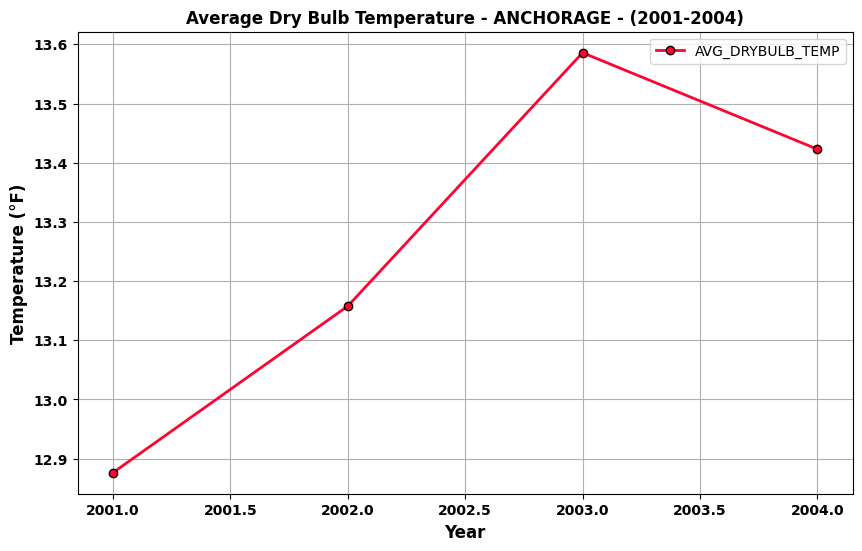

In [281]:
import matplotlib.pyplot as plt

# Plotting each variable over the years
plt.figure(figsize=(10, 6))

ax = plt.gca()

# Line plot for each variable
plt.plot(Anchorage_all_years_AVG_Metrics['Year'], Anchorage_all_years_AVG_Metrics['AVG_DRYBULB_TEMP'], marker='o', color='#ff0430', markeredgecolor = 'black' ,linewidth = 2, label='AVG_DRYBULB_TEMP')
#plt.plot(Anchorage_all_years_AVG_Metrics['Year'], Anchorage_all_years_AVG_Metrics['AVG_DailyDepartureFromNormalAverageTemperature'], marker='o', label='AVG_DailyDepartureFromNormalAverageTemperature')
#plt.plot(Anchorage_all_years_AVG_Metrics['Year'], Anchorage_all_years_AVG_Metrics['AVG_DailyAverageWindSpeed'], marker='o', label='AVG_DailyAverageWindSpeed')
#plt.plot(Anchorage_all_years_AVG_Metrics['Year'], Anchorage_all_years_AVG_Metrics['AVG_HourlySeaLevelPressure'], marker='o', label='AVG_HourlySeaLevelPressure')

# Titles and labels
plt.title('Average Dry Bulb Temperature - ANCHORAGE - (2001-2004)', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Temperature (°F)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

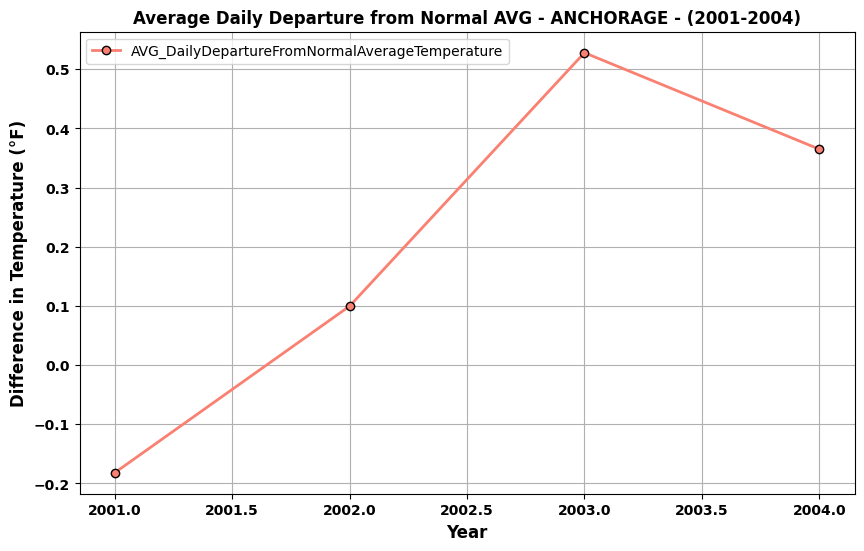

In [285]:
import matplotlib.pyplot as plt

# Plotting each variable over the years
plt.figure(figsize=(10, 6))

# Line plot for each variable
#plt.plot(Anchorage_all_years_AVG_Metrics['Year'], Anchorage_all_years_AVG_Metrics['AVG_DRYBULB_TEMP'], marker='o', label='AVG_DRYBULB_TEMP')
plt.plot(Anchorage_all_years_AVG_Metrics['Year'], Anchorage_all_years_AVG_Metrics['AVG_DailyDepartureFromNormalAverageTemperature'], marker='o', color='#FA8072', markeredgecolor = 'black' ,linewidth = 2,  label='AVG_DailyDepartureFromNormalAverageTemperature')
#plt.plot(Anchorage_all_years_AVG_Metrics['Year'], Anchorage_all_years_AVG_Metrics['AVG_DailyAverageWindSpeed'], marker='o', label='AVG_DailyAverageWindSpeed')
#plt.plot(Anchorage_all_years_AVG_Metrics['Year'], Anchorage_all_years_AVG_Metrics['AVG_HourlySeaLevelPressure'], marker='o', label='AVG_HourlySeaLevelPressure')


# Titles and labels
plt.title('Average Daily Departure from Normal AVG - ANCHORAGE - (2001-2004)', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Difference in Temperature (°F)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

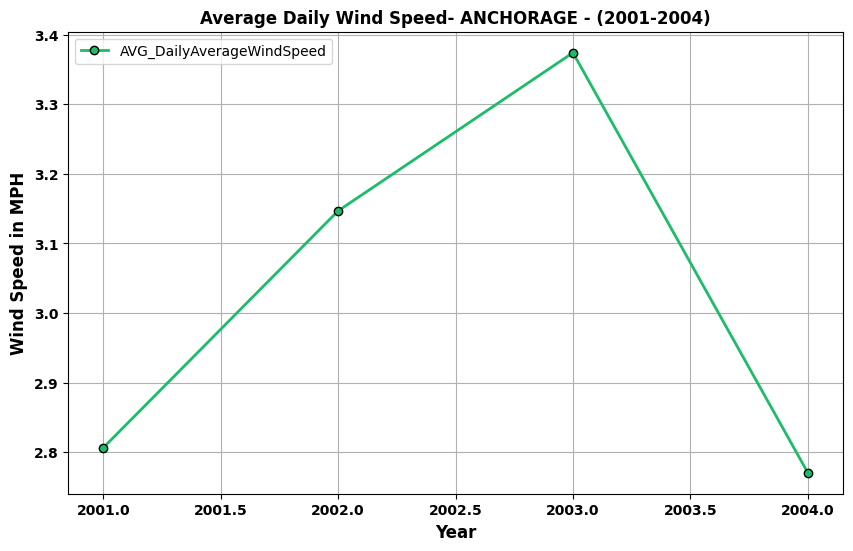

In [287]:
import matplotlib.pyplot as plt

# Plotting each variable over the years
plt.figure(figsize=(10, 6))

# Line plot for each variable
#plt.plot(Anchorage_all_years_AVG_Metrics['Year'], Anchorage_all_years_AVG_Metrics['AVG_DRYBULB_TEMP'], marker='o', label='AVG_DRYBULB_TEMP')
#plt.plot(Anchorage_all_years_AVG_Metrics['Year'], Anchorage_all_years_AVG_Metrics['AVG_DailyDepartureFromNormalAverageTemperature'], marker='o', label='AVG_DailyDepartureFromNormalAverageTemperature')
plt.plot(Anchorage_all_years_AVG_Metrics['Year'], Anchorage_all_years_AVG_Metrics['AVG_DailyAverageWindSpeed'], marker='o',  color='#1DBC68', markeredgecolor = 'black' ,linewidth = 2,   label='AVG_DailyAverageWindSpeed')
#plt.plot(Anchorage_all_years_AVG_Metrics['Year'], Anchorage_all_years_AVG_Metrics['AVG_HourlySeaLevelPressure'], marker='o', label='AVG_HourlySeaLevelPressure')

# Titles and labels
plt.title('Average Daily Wind Speed- ANCHORAGE - (2001-2004)', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Wind Speed in MPH', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

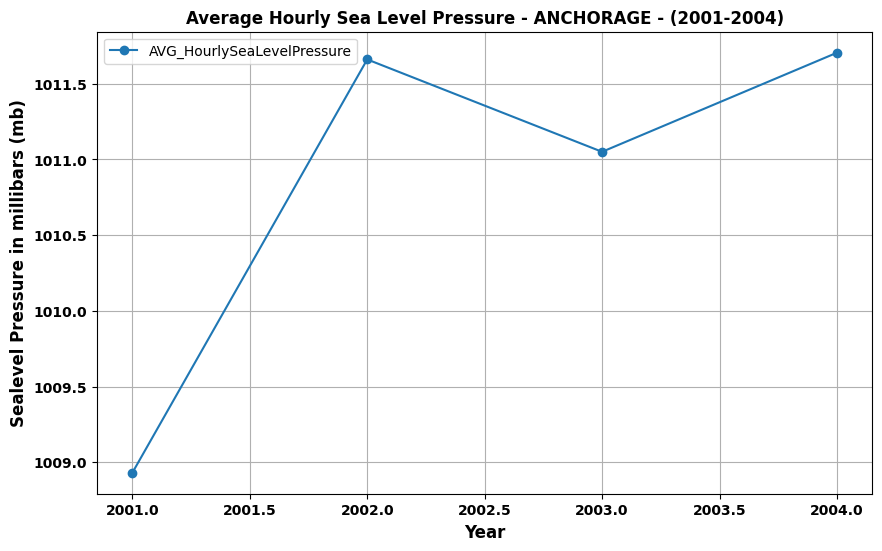

In [289]:
import matplotlib.pyplot as plt

# Plotting each variable over the years
plt.figure(figsize=(10, 6))

# Line plot for each variable
#plt.plot(Anchorage_all_years_AVG_Metrics['Year'], Anchorage_all_years_AVG_Metrics['AVG_DRYBULB_TEMP'], marker='o', label='AVG_DRYBULB_TEMP')
#plt.plot(Anchorage_all_years_AVG_Metrics['Year'], Anchorage_all_years_AVG_Metrics['AVG_DailyDepartureFromNormalAverageTemperature'], marker='o', label='AVG_DailyDepartureFromNormalAverageTemperature')
#plt.plot(Anchorage_all_years_AVG_Metrics['Year'], Anchorage_all_years_AVG_Metrics['AVG_DailyAverageWindSpeed'], marker='o', label='AVG_DailyAverageWindSpeed')
plt.plot(Anchorage_all_years_AVG_Metrics['Year'], Anchorage_all_years_AVG_Metrics['AVG_HourlySeaLevelPressure'], marker='o', label='AVG_HourlySeaLevelPressure')

# Titles and labels
plt.title('Average Hourly Sea Level Pressure - ANCHORAGE - (2001-2004)', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Sealevel Pressure in millibars (mb)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

Combine the Alaska economy years all together like the AVG Metrics

In [ ]:
# Add the 'Year' column to each DataFrame
Anchorage_2001_AVG_Metrics['Year'] = 2001
Anchorage_2002_AVG_Metrics['Year'] = 2002
Anchorage_2003_AVG_Metrics['Year'] = 2003
Anchorage_2004_AVG_Metrics['Year'] = 2004

In [291]:
# Combine them into one DataFrame
Anchorage_all_years_Economy_Metrics = pd.concat([AlaskaEconomy_copy_Anchorage_2001, AlaskaEconomy_copy_Anchorage_2002, 
                          AlaskaEconomy_copy_Anchorage_2003, AlaskaEconomy_copy_Anchorage_2004], ignore_index=True)

In [ ]:
print(AlaskaEconomy_copy_Anchorage_2004)

In [ ]:
print(Anchorage_all_years_Economy_Metrics)

In [293]:
Anchorage_all_years_Economy_Metrics.dtypes

OBJECTID                            int64
CommunityName                      object
DataYear                            int64
ResidentsAge16AndOver               int64
ResidentsEmployed                   int64
WagesLessThan5k                     int64
Wages5k_10k                         int64
Wages10k_20k                        int64
Wages20k_50k                        int64
WagesGreaterThan50k                 int64
EmployedInPrivateSector             int64
PercentInPrivateSector            float64
EmployedInStateGovt                 int64
PercentInStateGovt                float64
EmployedFemales                     int64
EmployedMales                       int64
EmployedAge45Plus                   int64
EmployedAge50Plus                   int64
EmployedIn1stQtr                    int64
EmployedIn2ndQtr                    int64
EmployedIn3rdQtr                    int64
EmployedIn4thQtr                    int64
EmployedInAllQtrs                   int64
NewHires                          

Anchorage_all_years_Economy_Metrics GRAPHS

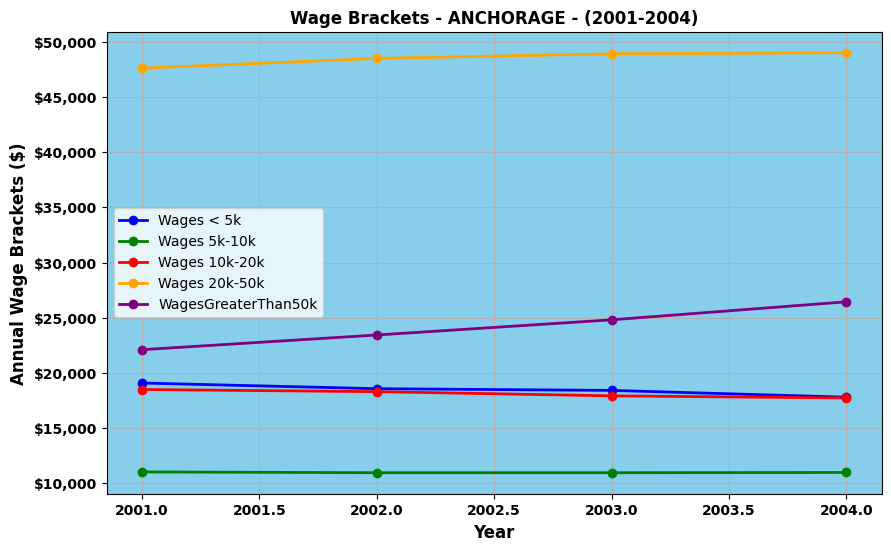

In [303]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# For this example, I'll focus on a few columns: 'ResidentsEmployed' and 'WagesLessThan5k'

# Grouping by YEAR and calculating the sum for each year for these variables
Anchorage_all_years_Economy_Metrics_grouped = Anchorage_all_years_Economy_Metrics.groupby('YEAR')[['ResidentsEmployed', 'WagesLessThan5k', 'Wages5k_10k', 'Wages10k_20k', 'Wages20k_50k', 'WagesGreaterThan50k']].sum()

# Plotting each variable over the years
plt.figure(figsize=(10, 6))

# Set the background color of the axes to light blue
ax = plt.gca()  # Get the current axes
ax.set_facecolor('#87CEEB')  # Set the facecolor to light blue (#87CEEB)

# Line plot for each variable
#plt.plot(Anchorage_all_years_Economy_Metrics_grouped.index, Anchorage_all_years_Economy_Metrics_grouped['ResidentsEmployed'], marker='o', label='Residents Employed', color='orange', linewidth=2)
plt.plot(Anchorage_all_years_Economy_Metrics_grouped.index, Anchorage_all_years_Economy_Metrics_grouped['WagesLessThan5k'], marker='o', label='Wages < 5k', color='blue', linewidth=2)
plt.plot(Anchorage_all_years_Economy_Metrics_grouped.index, Anchorage_all_years_Economy_Metrics_grouped['Wages5k_10k'], marker='o', label='Wages 5k-10k', color='green', linewidth=2)
plt.plot(Anchorage_all_years_Economy_Metrics_grouped.index, Anchorage_all_years_Economy_Metrics_grouped['Wages10k_20k'], marker='o', label='Wages 10k-20k', color='red', linewidth=2)
plt.plot(Anchorage_all_years_Economy_Metrics_grouped.index, Anchorage_all_years_Economy_Metrics_grouped['Wages20k_50k'], marker='o', label='Wages 20k-50k', color='orange', linewidth=2)
plt.plot(Anchorage_all_years_Economy_Metrics_grouped.index, Anchorage_all_years_Economy_Metrics_grouped['WagesGreaterThan50k'], marker='o', label='WagesGreaterThan50k', color='purple', linewidth=2)

# Titles and labels
plt.title('Wage Brackets - ANCHORAGE - (2001-2004)',fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Annual Wage Brackets ($)', fontsize=12, fontweight='bold')  # Use 'Count' or change as per your variable
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Legend
plt.legend()

# Format the y-axis with commas and dollar signs
def format_func(value, tick_position):
    return f'${value:,.0f}'  # Adds dollar sign and comma for thousands

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

# Show the plot
plt.grid(True)
plt.show()

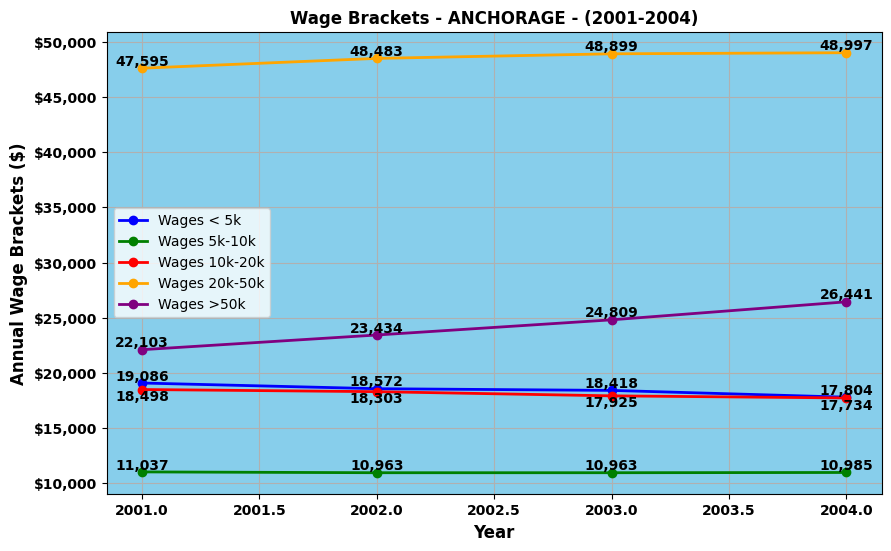

In [306]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Grouping by YEAR and calculating the sum for each year for these variables
Anchorage_all_years_Economy_Metrics_grouped = Anchorage_all_years_Economy_Metrics.groupby('YEAR')[['ResidentsEmployed', 'WagesLessThan5k', 'Wages5k_10k', 'Wages10k_20k', 'Wages20k_50k', 'WagesGreaterThan50k']].sum()

# Plotting each variable over the years
plt.figure(figsize=(10, 6))

# Set the background color of the axes to light blue
ax = plt.gca()  # Get the current axes
ax.set_facecolor('#87CEEB')  # Set the facecolor to light blue (#87CEEB)

# List of variables to plot
variables = ['WagesLessThan5k', 'Wages5k_10k', 'Wages10k_20k', 'Wages20k_50k', 'WagesGreaterThan50k']
colors = ['blue', 'green', 'red', 'orange', 'purple']
labels = ['Wages < 5k', 'Wages 5k-10k', 'Wages 10k-20k', 'Wages 20k-50k', 'Wages >50k']

# Loop through the variables and plot each one
for var, color, label in zip(variables, colors, labels):
    plt.plot(Anchorage_all_years_Economy_Metrics_grouped.index, 
             Anchorage_all_years_Economy_Metrics_grouped[var], 
             marker='o', 
             label=label, 
             color=color, 
             linewidth=2)
    
    # Add count labels to each point on the line
    for i, value in enumerate(Anchorage_all_years_Economy_Metrics_grouped[var]):
        formatted_value = f'{value:,.0f}'  # Format value with commas for thousands
        
        # Determine label position based on line color
        if color == 'blue':  # For the blue line, place the label above
            va_position = 'bottom'
            offset = 0  # No offset for blue
        elif color == 'red':  # For the red line, place the label below
            va_position = 'top'
            offset = 0  # No offset for red
        else:
            va_position = 'bottom'  # Default position for other lines
            offset = 0
        
        # Place the text above or below based on the condition
        plt.text(Anchorage_all_years_Economy_Metrics_grouped.index[i], 
                 value + offset, 
                 formatted_value, 
                 color='black', 
                 ha='center', 
                 va=va_position,  # Top or Bottom based on color
                 fontsize=10, 
                 fontweight='bold')  # Make the text bold

# Titles and labels
plt.title('Wage Brackets - ANCHORAGE - (2001-2004)', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Annual Wage Brackets ($)', fontsize=12, fontweight='bold')  # Adjust label to match context
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Legend
plt.legend()

# Format the y-axis with commas and dollar signs
def format_func(value, tick_position):
    return f'${value:,.0f}'  # Adds dollar sign and comma for thousands

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

# Show the plot
plt.grid(True)
plt.show()


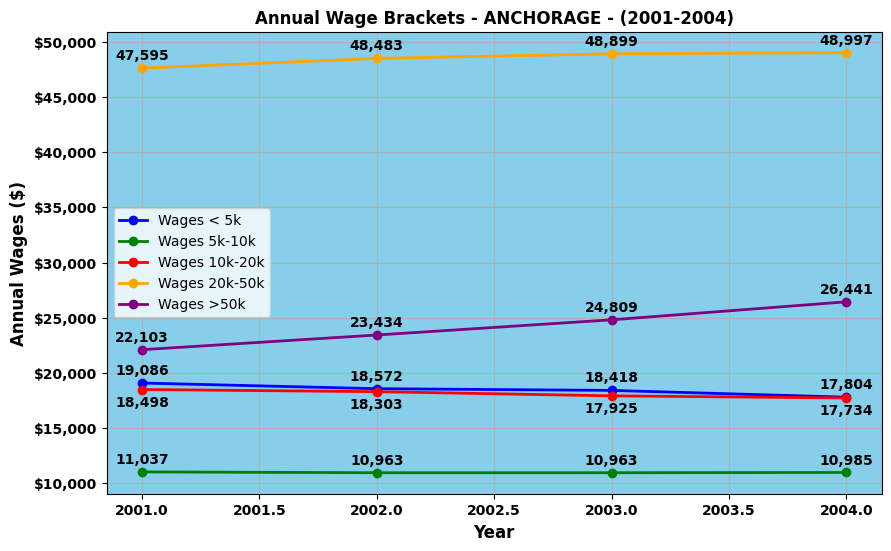

In [310]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Grouping by YEAR and calculating the sum for each year for these variables
Anchorage_all_years_Economy_Metrics_grouped = Anchorage_all_years_Economy_Metrics.groupby('YEAR')[['ResidentsEmployed', 'WagesLessThan5k', 'Wages5k_10k', 'Wages10k_20k', 'Wages20k_50k', 'WagesGreaterThan50k']].sum()

# Plotting each variable over the years
plt.figure(figsize=(10, 6))

# Set the background color of the axes to light blue
ax = plt.gca()  # Get the current axes
ax.set_facecolor('#87CEEB')  # Set the facecolor to light blue (#87CEEB)

# List of variables to plot
variables = ['WagesLessThan5k', 'Wages5k_10k', 'Wages10k_20k', 'Wages20k_50k', 'WagesGreaterThan50k']
colors = ['blue', 'green', 'red', 'orange', 'purple']
labels = ['Wages < 5k', 'Wages 5k-10k', 'Wages 10k-20k', 'Wages 20k-50k', 'Wages >50k']

# Loop through the variables and plot each one
for var, color, label in zip(variables, colors, labels):
    plt.plot(Anchorage_all_years_Economy_Metrics_grouped.index, 
             Anchorage_all_years_Economy_Metrics_grouped[var], 
             marker='o', 
             label=label, 
             color=color, 
             linewidth=2)
    
    # Add count labels to each point on the line
    for i, value in enumerate(Anchorage_all_years_Economy_Metrics_grouped[var]):
        formatted_value = f'{value:,.0f}'  # Format value with commas for thousands
        
        # Determine label position based on line color
        if color == 'blue':  # For the blue line, place the label above
            va_position = 'bottom'
            offset = 500  # Add a small offset for blue
        elif color == 'red':  # For the red line, place the label below
            va_position = 'top'
            offset = -500  # Add a small offset for red
        else:
            va_position = 'bottom'  # Default position for other lines
            offset = 500  # Add a small offset for other lines
        
        # Place the text above or below based on the condition
        plt.text(Anchorage_all_years_Economy_Metrics_grouped.index[i], 
                 value + offset, 
                 formatted_value, 
                 color='black', 
                 ha='center', 
                 va=va_position,  # Top or Bottom based on color
                 fontsize=10, 
                 fontweight='bold')  # Make the text bold

# Titles and labels
plt.title('Annual Wage Brackets - ANCHORAGE - (2001-2004)', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Annual Wages ($)', fontsize=12, fontweight='bold')  # Adjust label to match context
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Legend
plt.legend()

# Format the y-axis with commas and dollar signs
def format_func(value, tick_position):
    return f'${value:,.0f}'  # Adds dollar sign and comma for thousands

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

# Show the plot
plt.grid(True)
plt.show()


## 03302025 poster graphs

In [97]:
AlaskaEconomy_Wages = AlaskaEconomy
AlaskaEconomy_Wages1 = AlaskaEconomy

In [90]:
AlaskaEconomy_Wages.dtypes

OBJECTID                            int64
CommunityName                      object
DataYear                            int64
ResidentsAge16AndOver               int64
ResidentsEmployed                   int64
WagesLessThan5k                     int64
Wages5k_10k                         int64
Wages10k_20k                        int64
Wages20k_50k                        int64
WagesGreaterThan50k                 int64
EmployedInPrivateSector             int64
PercentInPrivateSector            float64
EmployedInStateGovt                 int64
PercentInStateGovt                float64
EmployedFemales                     int64
EmployedMales                       int64
EmployedAge45Plus                   int64
EmployedAge50Plus                   int64
EmployedIn1stQtr                    int64
EmployedIn2ndQtr                    int64
EmployedIn3rdQtr                    int64
EmployedIn4thQtr                    int64
EmployedInAllQtrs                   int64
NewHires                          

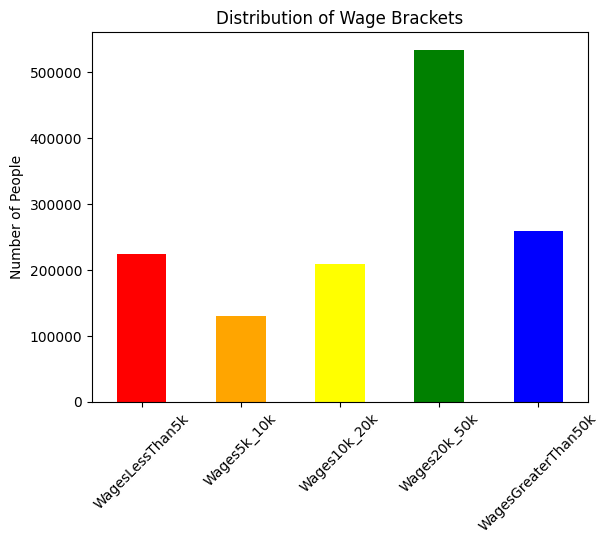

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

AlaskaEconomy_Wages1 = AlaskaEconomy_Wages[['WagesLessThan5k', 'Wages5k_10k', 'Wages10k_20k', 'Wages20k_50k', 'WagesGreaterThan50k']]

AlaskaEconomy_Wages1.sum().plot(kind='bar', color=['red', 'orange', 'yellow', 'green', 'blue'])
plt.title("Distribution of Wage Brackets")
plt.ylabel("Number of People")
plt.xticks(rotation=45)
plt.show()


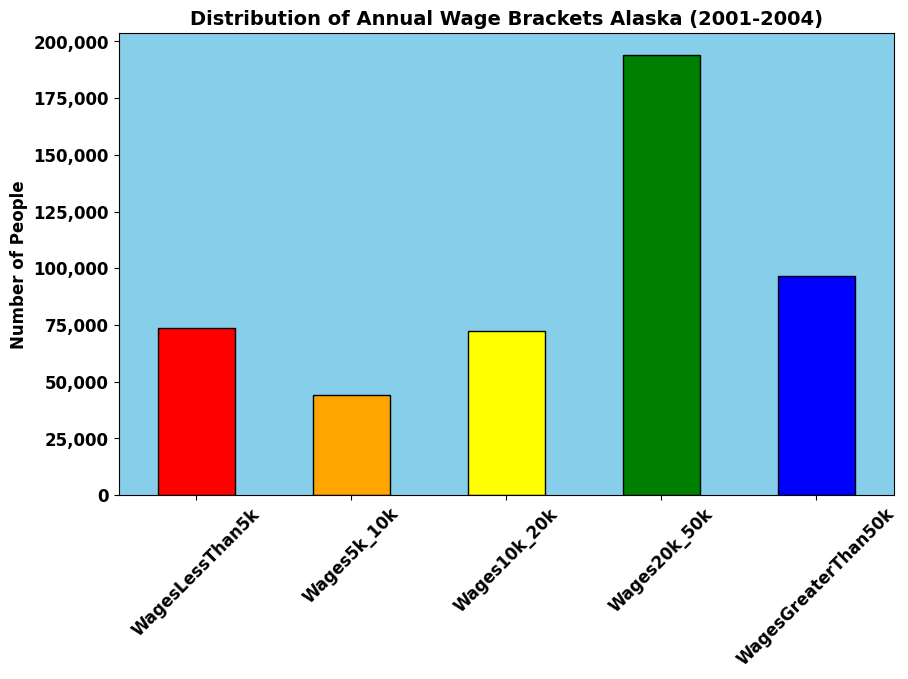

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Sum the wage data and plot
AlaskaEconomy_Wages_Anchorage1 = AlaskaEconomy_copy_Anchorage[['WagesLessThan5k', 'Wages5k_10k', 'Wages10k_20k', 'Wages20k_50k', 'WagesGreaterThan50k']]

# Plot the bar chart
ax = AlaskaEconomy_Wages_Anchorage1.sum().plot(kind='bar', 
                                               color=['red', 'orange', 'yellow', 'green', 'blue'],
                                               edgecolor='black',  # Same outline for all bars
                                               figsize=(10, 6))


# Set background color
ax.set_facecolor('#87CEEB')  # Light gray background

# Title and labels
plt.title("Distribution of Annual Wage Brackets Alaska (2001-2004)", fontsize=14, fontweight='bold')
plt.ylabel("Number of People", fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')


# Format the y-axis with commas and dollar signs
def format_func(value, tick_position):
    return f'{value:,.0f}'  # Adds dollar sign and comma for thousands

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

# Show the plot
plt.show()

Anchorage Graphs

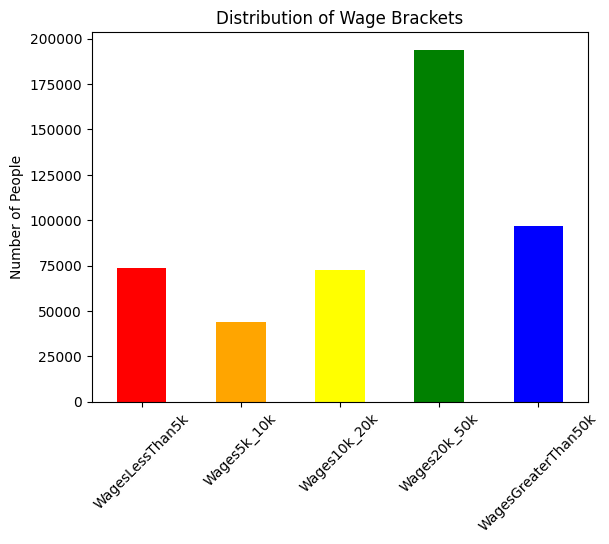

In [93]:
# AlaskaEconomy_Wages_Anchorage = AlaskaEconomy_copy_Anchorage

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

AlaskaEconomy_Wages_Anchorage1 = AlaskaEconomy_copy_Anchorage[['WagesLessThan5k', 'Wages5k_10k', 'Wages10k_20k', 'Wages20k_50k', 'WagesGreaterThan50k']]

AlaskaEconomy_Wages_Anchorage1.sum().plot(kind='bar', color=['red', 'orange', 'yellow', 'green', 'blue'])
plt.title("Distribution of Wage Brackets")
plt.ylabel("Number of People")
plt.xticks(rotation=45)
plt.show()

In [98]:
print(AlaskaEconomy_Wages1.columns)

Index(['OBJECTID', 'CommunityName', 'DataYear', 'ResidentsAge16AndOver',
       'ResidentsEmployed', 'WagesLessThan5k', 'Wages5k_10k', 'Wages10k_20k',
       'Wages20k_50k', 'WagesGreaterThan50k', 'EmployedInPrivateSector',
       'PercentInPrivateSector', 'EmployedInStateGovt', 'PercentInStateGovt',
       'EmployedFemales', 'EmployedMales', 'EmployedAge45Plus',
       'EmployedAge50Plus', 'EmployedIn1stQtr', 'EmployedIn2ndQtr',
       'EmployedIn3rdQtr', 'EmployedIn4thQtr', 'EmployedInAllQtrs', 'NewHires',
       'LocalLaborMarketInfoURL', 'TotalWages',
       'UnemploymentInsuranceClaimants', 'x', 'y'],
      dtype='object')


Can plug in whatever variable for the x,y 

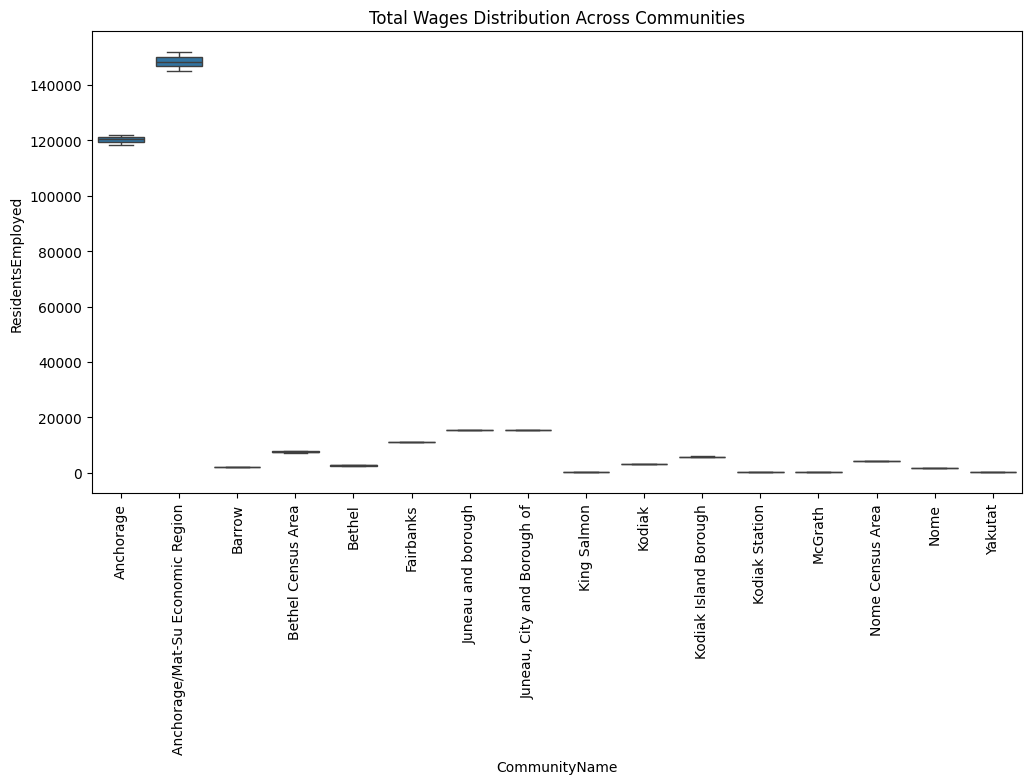

In [241]:
# 7. Box Plot: Distribution of Wages across Communities
plt.figure(figsize=(12, 6))
sns.boxplot(data=AlaskaEconomy_Wages1, x='CommunityName', y='ResidentsEmployed')
plt.xticks(rotation=90)
plt.title("Total Wages Distribution Across Communities")
plt.show()

In [ ]:
AlaskaEconomy_Wages1.dtypes

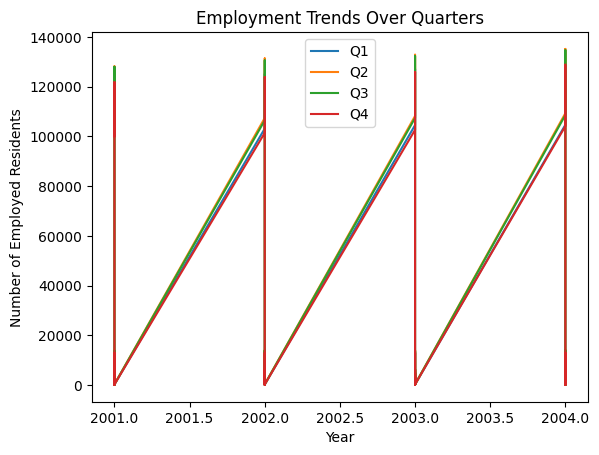

In [103]:
# 4. Line Plot: Employment trends over time
plt.plot(AlaskaEconomy_Wages1['DataYear'], AlaskaEconomy_Wages1['EmployedIn1stQtr'], label="Q1")
plt.plot(AlaskaEconomy_Wages1['DataYear'], AlaskaEconomy_Wages1['EmployedIn2ndQtr'], label="Q2")
plt.plot(AlaskaEconomy_Wages1['DataYear'], AlaskaEconomy_Wages1['EmployedIn3rdQtr'], label="Q3")
plt.plot(AlaskaEconomy_Wages1['DataYear'], AlaskaEconomy_Wages1['EmployedIn4thQtr'], label="Q4")
plt.xlabel("Year")
plt.ylabel("Number of Employed Residents")
plt.title("Employment Trends Over Quarters")
plt.legend()
plt.show()

## <span style="color:#ffd900"> Resources/Python</span>

Python Libraries You Can Use:

* pandas, numpy: data manipulation.
* biopython: parsing genomic data (FASTA, GenBank, etc.).
* scikit-learn: clustering, PCA, and machine learning.
* matplotlib, seaborn, plotly: visualizations like heatmaps, scatter plots, and interactive graphs.
* statsmodels, scipy: statistical testing.
* pyvcf: handling VCF files (Variant Call Format).
* scikit-bio: more advanced bioinformatics analyses.

2025-02-26
* plotnine

R
* Ggplot2
    *facet wrap

How to visualize [salmon populations] across regions like in Presentation 1 blurb:
*  You can visualize this using XYZ
    * XYZ: definition


Random [Farm-Fishing] readings/findings:

* Fishing clusters
    * Visualize this with heatmaps
        * this is proabbaly the greatest visual representation method for this data
* Most popular species of salmon fished for commercial use 
* Most popular brands who sell in grocery stores/distribute to restaurants or businesses

## <span style="color:#00ff00;">Sources/Readings/Datasets</span>

Fishing
* https://www.nationalfisherman.com/alaska/alaska-salmon-2024-markets-still-flooded-as-next-harvest-forecasts-come-in#:~:text=Overall%2C%20values%20for%20all%20species,that%20was%20generated%20in%202022. 
* https://www.undercurrentnews.com/2025/01/30/global-salmon-supply-down-in-2024-due-to-underperforming-alaska-fisheries-gsmc-attendees-hear/
* https://www.ibisworld.com/united-states/economic-profiles/alaska/
* https://www.noaa.gov/fisheries

Climate
* https://sealevel.nasa.gov/
* https://climate.nasa.gov/vital-signs/sea-level/?intent=121
* https://www.noaa.gov/

Economy
* https://www.theglobaleconomy.com/download-data.php
* https://gis.data.alaska.gov/datasets/DCCED::employment-and-wages-2001-to-2016-all-locations/about
    * https://gis.data.alaska.gov/datasets/DCCED::employment-and-wages-2001-to-2016-all-locations/explore?location=0.001964%2C0.000000%2C1.99&showTable=true

    * Statista
        * https://www.statista.com/statistics/187828/gdp-of-the-us-federal-state-of-alaska-since-1997/
        * https://www.statista.com/statistics/205753/median-household-income-in-alaska/
        * https://www.statista.com/statistics/205426/poverty-rate-in-alaska/
        * https://www.statista.com/statistics/205206/per-capita-personal-income-in-alaska/
        * https://www.statista.com/statistics/1036036/alaska-real-gdp-growth/
        * https://www.statista.com/statistics/189390/unemployment-rate-in-alaska-since-1992/


### <span style="color:#FFA07A;">Datasets</span>


* NOAA
    * NOAA Climatological Data
        * https://www.ncdc.noaa.gov/cdo-web/datatools/lcd
    * NOAA Fisheries
* Alaska Department of Fish and Games
* NASA & NOAA Climate Data
* FAI Fisheries $ Aquaculture Division
* https://www.bco-dmo.org/dataset/3106
    * https://erddap.bco-dmo.org/erddap/tabledap/bcodmo_dataset_3106.htmlTable

## <span style="color:#ff0000;">Definitions/Dictionary [Not in Use]</span>

* word: definitions. 
    
    * How [blank] occur:
    
        A 

* word: definitions. 
    
    * How [meausrements] are down:
    
        A 

## <span style="color:#ffd900"> Ideas/Future Devolpments</span>

* Biology

    * Genetics
        * Gene Expression and Disease Correlation
            Hypothesis: Specific gene expression patterns are strongly correlated with certain diseases (like cancer, diabetes, etc.).
            Approach: Utilize RNA-seq datasets from sources like the Cancer Genome Atlas (TCGA) to find correlations between gene expression levels and disease status. Heatmaps or volcano plots could be used to visualize differential gene expression.
        * Genetic Bassis of Physical Traits
            Hypothesis: Variations in certain genes are associated with observable traits like height, eye color, or even susceptibility to certain conditions.
            Approach: You could explore GWAS (Genome-Wide Association Study) datasets to see if specific SNPs are linked to traits. Manhattan plots are great for visualizing this kind of data.
        * Evolutionary Genomics
            Hypothesis: Comparing the genomes of different species reveals evolutionary relationships and conserved genes.
            Approach: Use comparative genomics data to find conserved sequences between species. Phylogenetic trees and sequence alignment visualizations can help illustrate evolutionary relationships.
        * Microbiome Diversity Analysis
            Hypothesis: The diversity of microbial genes in the gut microbiome varies significantly with diet, geography, or health status.
            Approach: Analyze microbiome datasets (like from the Human Microbiome Project) and visualize microbial diversity using bar plots, heatmaps, or ordination techniques like NMDS (Non-metric Multidimensional Scaling).
    

* Healthcare
    * Hospital datasets
* Animals
	* Animal Genes
	* Marine fish
	* Marine biology dataset

* Weather
	* https://www.ncdc.noaa.gov/cdo-web/datasets
    * Climate change
	    * the effects on climate change through the years, temperatures
 

* Finance
    * default